In [752]:
import os
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Loading results dataframes

In [753]:
results_path = os.path.join("..","results","predictions")
GNN_metrics = pd.read_csv(os.path.join(results_path, "GNN_metrics_results.csv"))

In [754]:
GNN_metrics

Unnamed: 0 model   target                  timeperiod breakout      rmse  \
0           0   GNN    plugs                 all_of_2022     test  2.358623   
1           1   GNN  unplugs                 all_of_2022     test  2.458081   
2           2   GNN    plugs  all_of_2022_weather_lagged     test  2.357337   
3           3   GNN  unplugs  all_of_2022_weather_lagged     test  2.465814   
4           4   GNN    plugs           INNOVA_comparison     test  4.307843   
5           5   GNN  unplugs           INNOVA_comparison     test  4.298373   

        mae        r2  
0  1.583867  0.171940  
1  1.629585  0.148620  
2  1.579067  0.180346  
3  1.643799  0.150276  
4  2.847024  0.165769  
5  2.860201  0.157927

### Visualization
 The areas to analize will be the following:
 - Madrid's financial heart: the areas recommended by this link (this is around paseo de la castellana, plaza castilla and cuatro torres business area. This represents the financial heart of Madrid): https://www.jll.es/es/analisis-y-tendencias/espacios-de-trabajo/las-mejores-zonas-de-madrid-para-alquilar-una-oficina#:~:text=El%20coraz%C3%B3n%20financiero%20de%20Madrid,de%20perfil%20comercial%20como%20financiero. Problem: this stations were added in the middle, so are not pressent in the GNN model due to the static graph approach.
 - Office_areas: another option to analyze office areas will be azca area and cuzco square. https://www.lexington.es/blog/mejores-zonas-madrid-donde-ubicar-empresa
 - residential area: chamberí has been chosen
 - parks area: el retiro has been chosen

In [755]:
# defining filters
financial_heart_area = ((40.483262, -3.692647),(40.464446, -3.680902))
azca_area = ((40.453766, -3.699252),(40.444801, -3.687597))
cuzco_square_area = ((40.460720, -3.692425),(40.457511, -3.688181))
residential_area = ((40.439258, -3.717681),(40.429338, -3.704286))
retiro_park = ((40.421470, -3.692627),(40.408925, -3.673788))

areas = [azca_area,cuzco_square_area,residential_area,retiro_park]
names = ["azca area","cuzco square area","Chamberí","retiro park"]


### Visualizing stations and areas

In [756]:
XGB_data_innova = pd.read_csv(os.path.join(results_path, "predictions_fixed_INNOVA_comparison_test.csv"))
GNN_data_2022 = pd.read_csv(os.path.join(results_path, "GNN_data_2022_with_predictions.csv"))


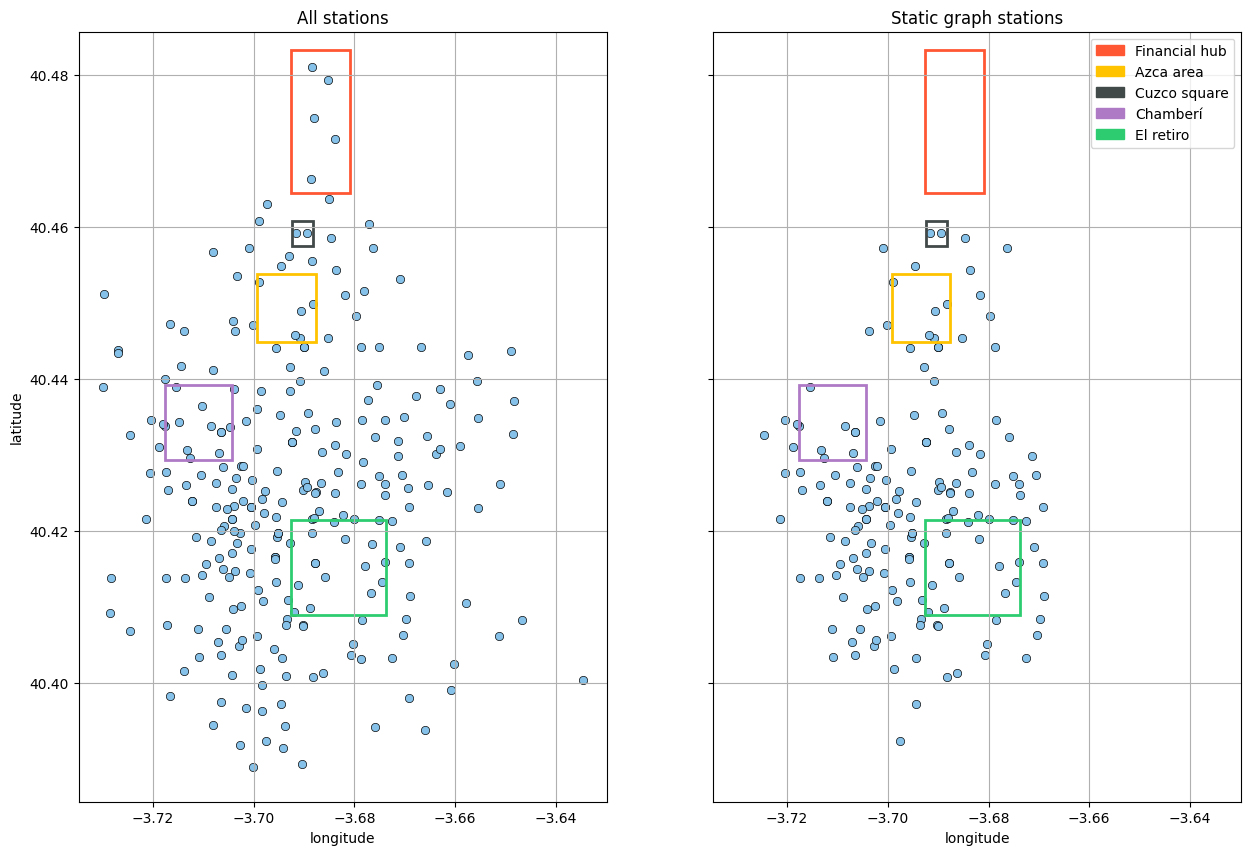

In [757]:
nrows = 1
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10),sharex=True, sharey=True)

# palette creation with respect to the weather stations that are used for each magnitude
weather_station_codes = XGB_data_innova["number"].unique()

# scatter plot of the weather stations
sns.scatterplot(data=XGB_data_innova.groupby(by="number").first().reset_index(), x="longitude", y="latitude",color="#85C1E9",
                marker="o", edgecolor="black", alpha=1, legend=None, ax=axes[0])

sns.scatterplot(data=GNN_data_2022.groupby(by="number").first().reset_index(), x="longitude", y="latitude",color="#85C1E9",
                marker="o", edgecolor="black", alpha=1, legend=None, ax=axes[1])

rectangle_offices = patches.Rectangle((financial_heart_area[0][1], financial_heart_area[0][0]), 
                                      width=financial_heart_area[1][1]-financial_heart_area[0][1], 
                                      height=financial_heart_area[1][0]-financial_heart_area[0][0], 
                                      linewidth=2, edgecolor='#FF5733', facecolor='none')

rectangle_azca = patches.Rectangle((azca_area[0][1], azca_area[0][0]), 
                                      width=azca_area[1][1]-azca_area[0][1], 
                                      height=azca_area[1][0]-azca_area[0][0], 
                                      linewidth=2, edgecolor='#FFC300', facecolor='none')

rectangle_cuzco_square_area = patches.Rectangle((cuzco_square_area[0][1], cuzco_square_area[0][0]), 
                                      width=cuzco_square_area[1][1]-cuzco_square_area[0][1], 
                                      height=cuzco_square_area[1][0]-cuzco_square_area[0][0], 
                                      linewidth=2, edgecolor='#424949', facecolor='none')

rectangle_residential = patches.Rectangle((residential_area[0][1], residential_area[0][0]), 
                                          width=residential_area[1][1]-residential_area[0][1], 
                                          height=residential_area[1][0]-residential_area[0][0], 
                                          linewidth=2, edgecolor='#AF7AC5', facecolor='none')
rectangle_parks = patches.Rectangle((retiro_park[0][1], retiro_park[0][0]), 
                                    width=retiro_park[1][1]-retiro_park[0][1], 
                                    height=retiro_park[1][0]-retiro_park[0][0], 
                                    linewidth=2, edgecolor='#2ECC71', facecolor='none')

axes[0].add_patch(rectangle_offices)
axes[0].add_patch(rectangle_azca)
axes[0].add_patch(rectangle_cuzco_square_area)
axes[0].add_patch(rectangle_residential)
axes[0].add_patch(rectangle_parks)
axes[0].set_title("All stations")
axes[0].grid(True)

rectangle_offices = patches.Rectangle((financial_heart_area[0][1], financial_heart_area[0][0]), 
                                      width=financial_heart_area[1][1]-financial_heart_area[0][1], 
                                      height=financial_heart_area[1][0]-financial_heart_area[0][0], 
                                      linewidth=2, edgecolor='#FF5733', facecolor='none')

rectangle_azca = patches.Rectangle((azca_area[0][1], azca_area[0][0]), 
                                      width=azca_area[1][1]-azca_area[0][1], 
                                      height=azca_area[1][0]-azca_area[0][0], 
                                      linewidth=2, edgecolor='#FFC300', facecolor='none')

rectangle_cuzco_square_area = patches.Rectangle((cuzco_square_area[0][1], cuzco_square_area[0][0]), 
                                      width=cuzco_square_area[1][1]-cuzco_square_area[0][1], 
                                      height=cuzco_square_area[1][0]-cuzco_square_area[0][0], 
                                      linewidth=2, edgecolor='#424949', facecolor='none')

rectangle_residential = patches.Rectangle((residential_area[0][1], residential_area[0][0]), 
                                          width=residential_area[1][1]-residential_area[0][1], 
                                          height=residential_area[1][0]-residential_area[0][0], 
                                          linewidth=2, edgecolor='#AF7AC5', facecolor='none')
rectangle_parks = patches.Rectangle((retiro_park[0][1], retiro_park[0][0]), 
                                    width=retiro_park[1][1]-retiro_park[0][1], 
                                    height=retiro_park[1][0]-retiro_park[0][0], 
                                    linewidth=2, edgecolor='#2ECC71', facecolor='none')

axes[1].add_patch(rectangle_offices)
axes[1].add_patch(rectangle_azca)
axes[1].add_patch(rectangle_cuzco_square_area)
axes[1].add_patch(rectangle_residential)
axes[1].add_patch(rectangle_parks)
axes[1].set_title("Static graph stations")
axes[1].grid(True)

offices_tag = patches.Patch(color='#FF5733', label='Financial hub')
azca_area_tag = patches.Patch(color='#FFC300', label='Azca area')
cuzco_square_tag = patches.Patch(color='#424949', label='Cuzco square')
chamberi_tag = patches.Patch(color='#AF7AC5', label='Chamberí')
parks_tag = patches.Patch(color='#2ECC71', label='El retiro')

plt.legend(handles=[offices_tag,azca_area_tag,cuzco_square_tag,chamberi_tag,parks_tag])




In [758]:
#defining visualization utils
def filtering_stations_by_area(df,area):
    upper_left_lat = area[0][0]
    upper_left_lon = area[0][1]
    lower_right_lat = area[1][0]
    lower_right_lon = area[1][1]

    filtered_df = df[
        (df['latitude'] >= lower_right_lat) &
        (df['latitude'] <= upper_left_lat) &
        (df['longitude'] >= upper_left_lon) &
        (df['longitude'] <= lower_right_lon)
    ]

    return filtered_df

def filtering_by_time(df, low_date, up_date, time_column):
    df[time_column] = pd.to_datetime(df[time_column])

    filtered_df = df[(df[time_column]>=low_date)&(df[time_column]<=up_date)]

    return filtered_df


def show_plugs_unplugs(df,start_date,end_date,time_column,upper_y_lim, peak_hours = True, xlabel = "hours"):
    
    df = filtering_by_time(df, start_date, end_date, time_column)

    nrows = 2
    ncols = 1

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10),sharex=True, sharey=True)

    sns.lineplot(data=df["prediction_unplugs"].reset_index(drop=True), label="pred", color="#2874A6", ax = axes[0])
    sns.lineplot(data=df["unplugs_count"].reset_index(drop=True), label="true", color="#85c1e9", ax = axes[0])

    sns.lineplot(data=df["prediction_plugs"].reset_index(drop=True), label="pred", color="#2874A6", ax = axes[1])
    sns.lineplot(data=df["plugs_count"].reset_index(drop=True), label="true", color="#85c1e9", ax = axes[1])

    axes[0].grid(True)
    axes[1].grid(True)

    # Set y-limits
    axes[0].set_ylim([0, upper_y_lim])  # Adjust the upper and lower limits as per your requirements
    axes[1].set_ylim([0, upper_y_lim])  # Adjust the upper and lower limits as per your requirements

    predictions = patches.Patch(color='#2874A6', label='Pred')
    true_values = patches.Patch(color='#85c1e9', label='True')

    handles = [predictions,true_values]

    if peak_hours:
        # Draw vertical lines
        x_points_9 = np.arange(9,len(df),24)  # X points where vertical lines will be drawn
        for ax in axes:
            for x in x_points_9:
                ax.axvline(x=x, color='#E59866', linestyle='-', linewidth=1)

        x_points_17 = np.arange(18,len(df),24)  # X points where vertical lines will be drawn
        for ax in axes:
            for x in x_points_17:
                ax.axvline(x=x, color='#D35400', linestyle='-', linewidth=1)
        
        mark_9am = patches.Patch(color='#E59866', label='9am mark')
        mark_18pm = patches.Patch(color='#D35400', label='6pm mark')

        handles.append(mark_9am)
        handles.append(mark_18pm)

    axes[0].legend(handles=handles,loc='upper right')
    axes[1].legend(handles=handles,loc='upper right')

    axes[0].set(xlabel = xlabel)
    axes[1].set(xlabel=xlabel)

    plt.show()

def show_plugs_unplugs_weather(df,start_date,end_date,time_column,upper_y_lim,weather_lagged=False, peak_hours = True, xlabel = "hour"):
    
    df = filtering_by_time(df, start_date, end_date, time_column)

    nrows = 3
    ncols = 1

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15),sharex=True, sharey=False)


    sns.lineplot(data=df["89"].reset_index(drop=True), label="rain", color="#b402f5", ax = axes[0]) 
    axes[0].set_ylabel('liters/$m^2$')
    
    ax2_temp = axes[0].twinx()
    sns.lineplot(data=df["83"].reset_index(drop=True), label="temperature", color="#E74C3C", ax = ax2_temp)
    ax2_temp.set_ylabel('ºC')

    sns.lineplot(data=df["prediction_unplugs"].reset_index(drop=True), label="pred", color="#2874A6", ax = axes[1])
    sns.lineplot(data=df["unplugs_count"].reset_index(drop=True), label="true", color="#85c1e9", ax = axes[1])

    sns.lineplot(data=df["prediction_plugs"].reset_index(drop=True), label="pred", color="#2874A6", ax = axes[2])
    sns.lineplot(data=df["plugs_count"].reset_index(drop=True), label="true", color="#85C1E9", ax = axes[2])

    if weather_lagged:
        
        sns.lineplot(data=df["prediction_unplugs_weather_lagged"].reset_index(drop=True), label="pred weather lagged", color="#17202A", ax = axes[1])
        sns.lineplot(data=df["prediction_plugs_weather_lagged"].reset_index(drop=True), label="pred weather lagged", color="#17202A", ax = axes[2])
        


    axes[0].grid(True)
    axes[1].grid(True)
    axes[2].grid(True)

    # Set y-limits
    axes[1].set_ylim([0, upper_y_lim])  # Adjust the upper and lower limits as per your requirements
    axes[2].set_ylim([0, upper_y_lim])  # Adjust the upper and lower limits as per your requirements

    axes[0].set(xlabel = xlabel)
    axes[1].set(xlabel=xlabel)
    axes[2].set(xlabel=xlabel)

    if peak_hours:
        # Draw vertical lines
        x_points_9 = np.arange(9,len(df),24)  # X points where vertical lines will be drawn
        for ax in axes:
            for x in x_points_9:
                ax.axvline(x=x, color='#E59866', linestyle='-', linewidth=1)

        x_points_18 = np.arange(18,len(df),24)  # X points where vertical lines will be drawn
        for ax in axes:
            for x in x_points_18:
                ax.axvline(x=x, color='#D35400', linestyle='-', linewidth=1)

    temperature = patches.Patch(color='#E74C3C', label='Temperature')
    rain = patches.Patch(color='#b402f5', label='Rain')


    predictions = patches.Patch(color='#2874A6', label='Pred')
    true_values = patches.Patch(color='#85c1e9', label='True')
    mark_9am = patches.Patch(color='#E59866', label='9am mark')
    mark_18pm = patches.Patch(color='#D35400', label='6pm mark')
    predictions_weather_lagged = patches.Patch(color='#17202A', label='Pred weather lagged')

    axes[0].legend(handles=[temperature,rain,mark_9am,mark_18pm],loc='upper right')
    axes[1].legend(handles=[predictions,predictions_weather_lagged,true_values,mark_9am,mark_18pm],loc='upper right')
    axes[2].legend(handles=[predictions,predictions_weather_lagged,true_values,mark_9am,mark_18pm],loc='upper right')

    plt.show()

# Visualizations

In [759]:
GNN_metrics

Unnamed: 0 model   target                  timeperiod breakout      rmse  \
0           0   GNN    plugs                 all_of_2022     test  2.358623   
1           1   GNN  unplugs                 all_of_2022     test  2.458081   
2           2   GNN    plugs  all_of_2022_weather_lagged     test  2.357337   
3           3   GNN  unplugs  all_of_2022_weather_lagged     test  2.465814   
4           4   GNN    plugs           INNOVA_comparison     test  4.307843   
5           5   GNN  unplugs           INNOVA_comparison     test  4.298373   

        mae        r2  
0  1.583867  0.171940  
1  1.629585  0.148620  
2  1.579067  0.180346  
3  1.643799  0.150276  
4  2.847024  0.165769  
5  2.860201  0.157927

## Innova test set visualizations

- All stations
- Specific areas(azca_area, cuzco_square_area, residential_area, retiro_park)

The models analyzed will be:
- GNN
- for XGBoost ______

keep in mind that the true values for GNN and XGBoost analysis will differ, as for the GNN we needed to build a static graph over time, which forced us to work with only the stations that existed in all the time span instead of all of them.

In [760]:
start_date_innova_test_set=dt.datetime(2021,6,20)
end_date_innova_test_set=dt.datetime(2021,6,27)

### GNN

In [761]:
GNN_data_innova = pd.read_csv(os.path.join(results_path, "GNN_data_innova_with_predictions.csv"))
GNN_data_innova = GNN_data_innova.dropna(how="any")

#### Average over all stations

In [762]:
GNN_data_innova_hour_aggregation_overall = GNN_data_innova.groupby(by="time").mean().reset_index()[["plugs_count","prediction_plugs","unplugs_count","prediction_unplugs","time"]]

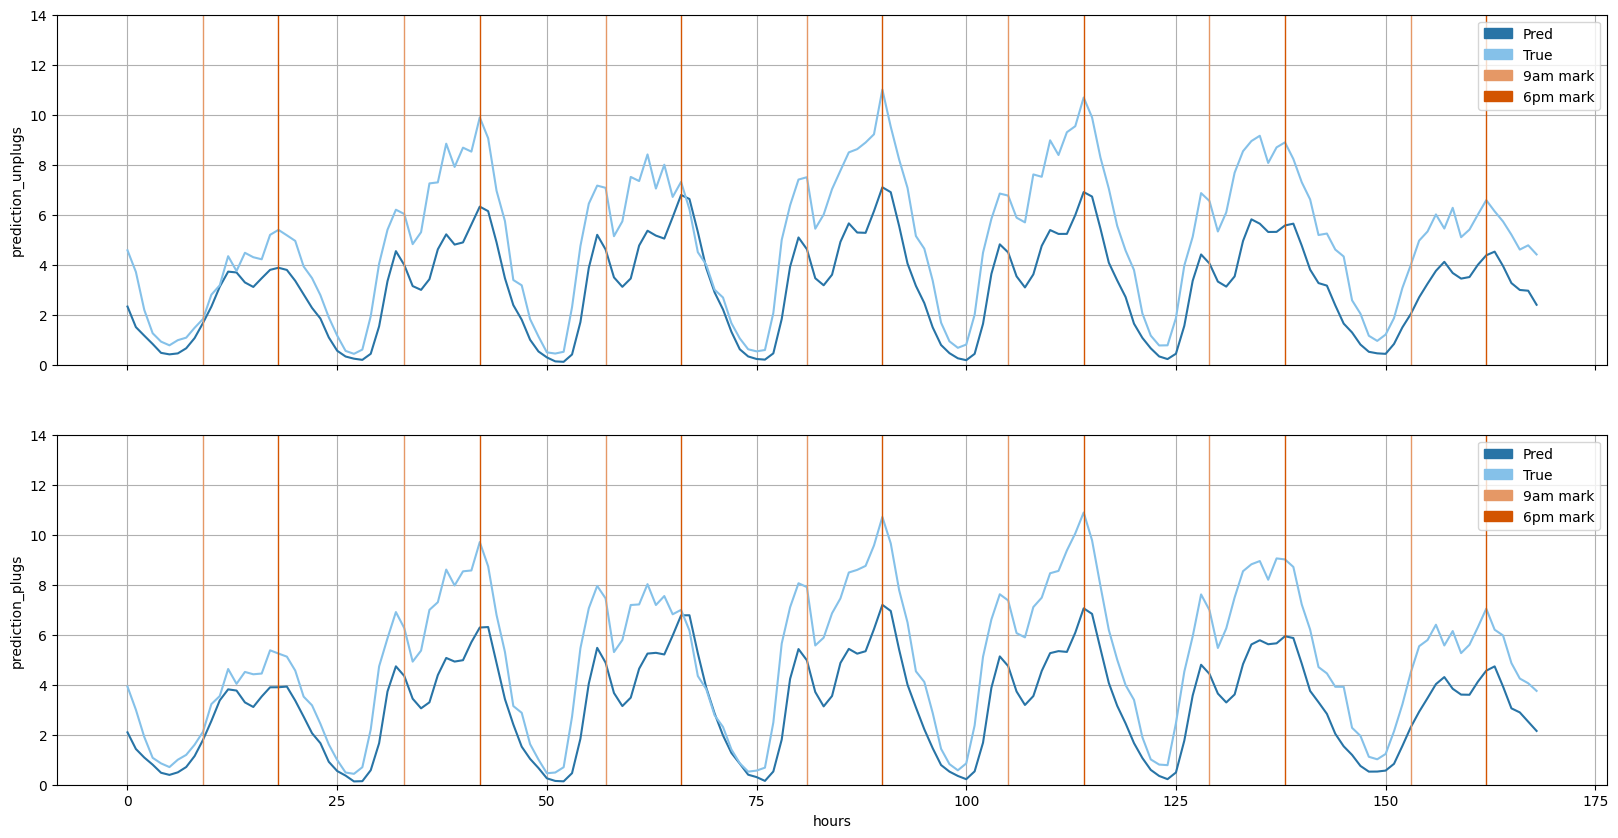

In [763]:
show_plugs_unplugs(GNN_data_innova_hour_aggregation_overall,start_date=start_date_innova_test_set,end_date=end_date_innova_test_set,time_column="time",upper_y_lim=14)

#### Specific areas

Name of the area: azca area
Number of stations used: 5


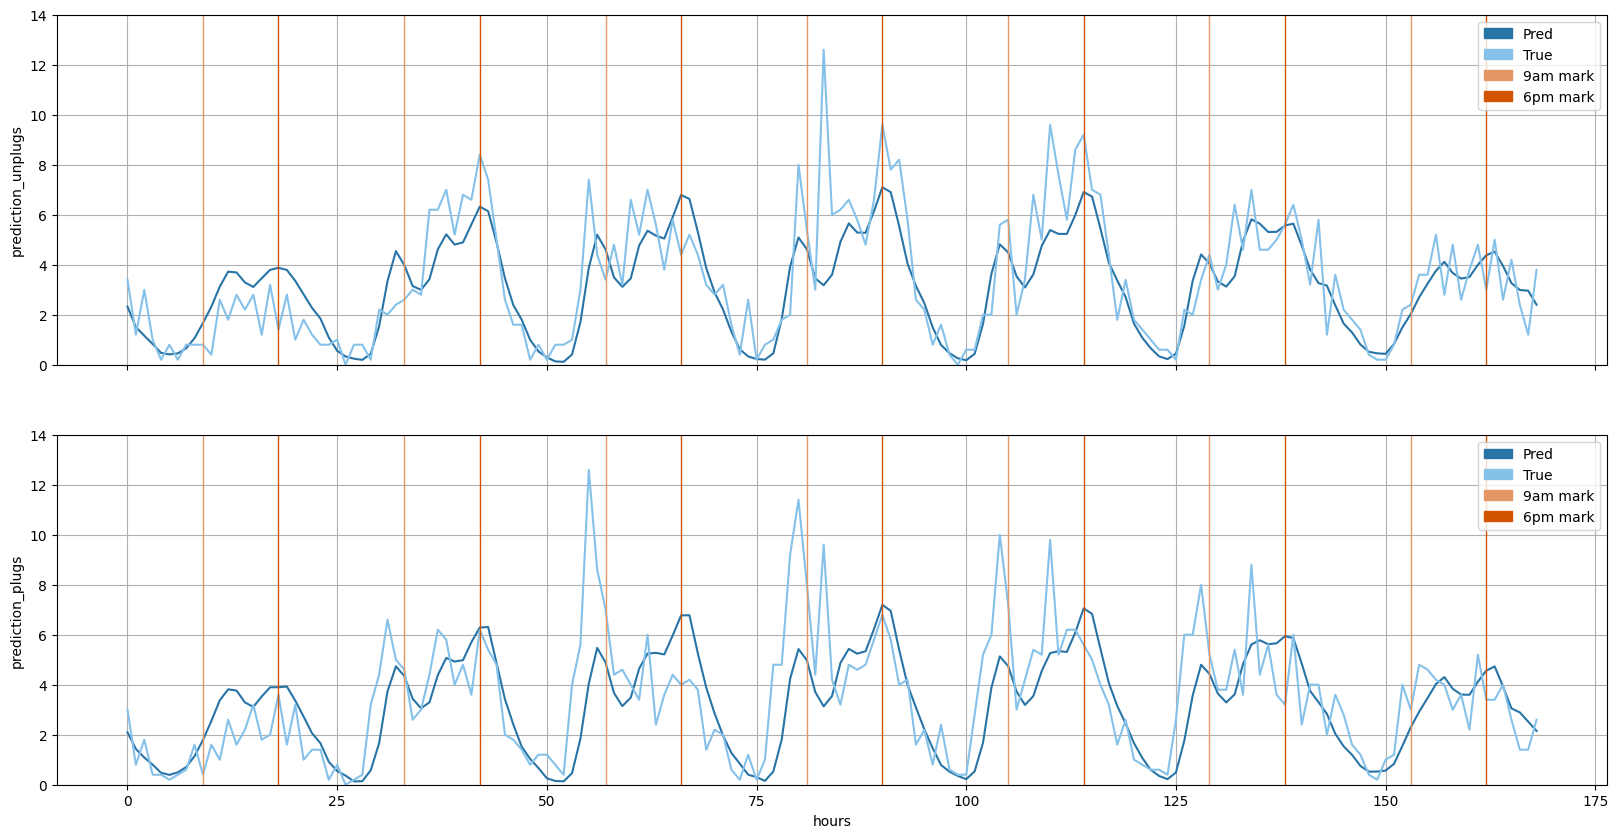

Name of the area: cuzco square area
Number of stations used: 2


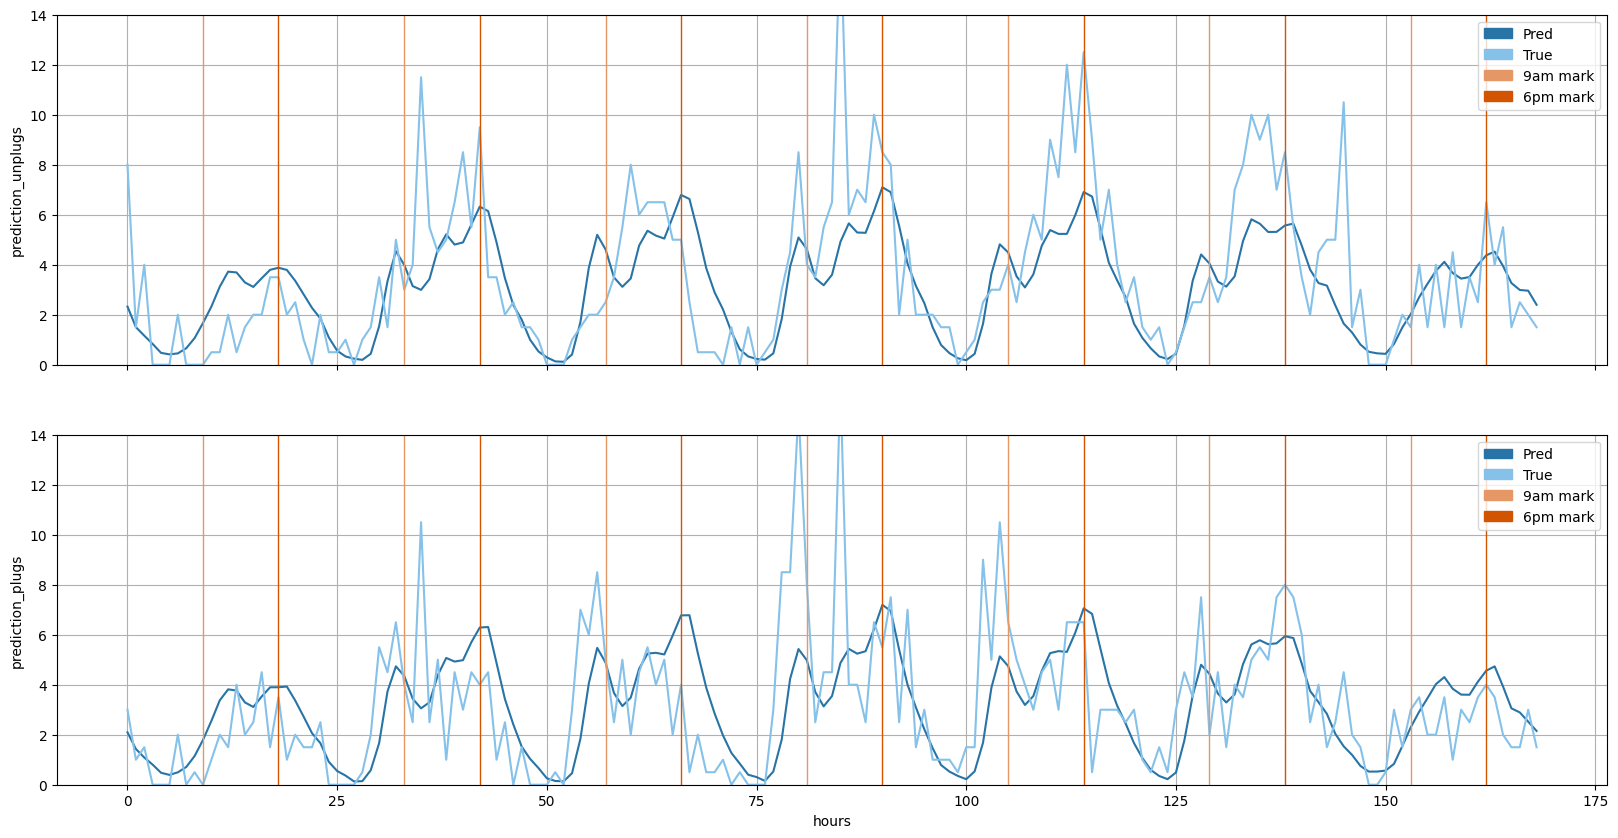

Name of the area: Chamberí
Number of stations used: 8


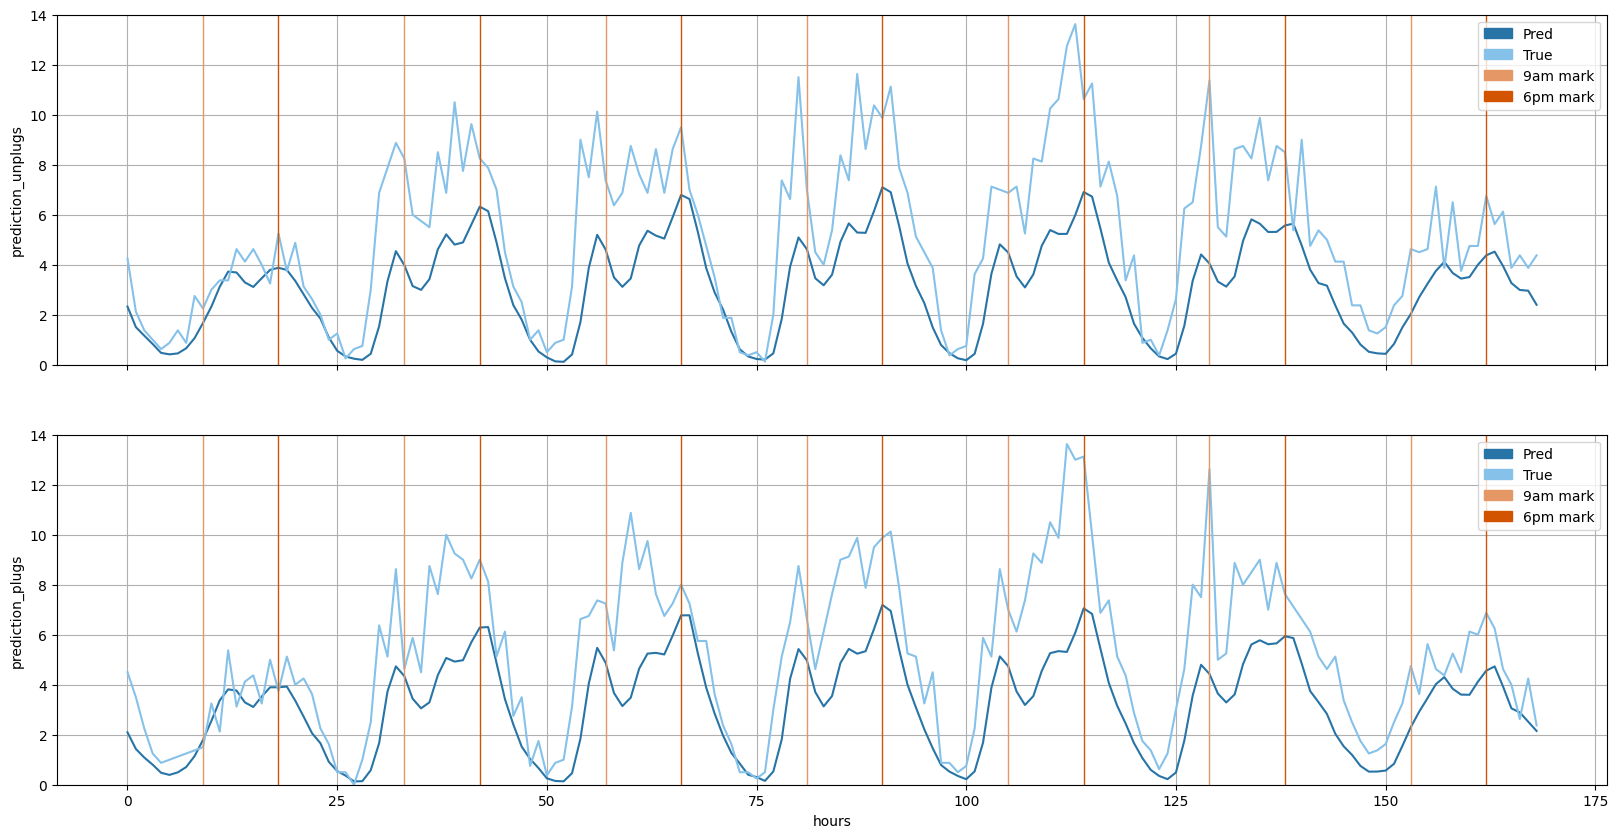

Name of the area: retiro park
Number of stations used: 14


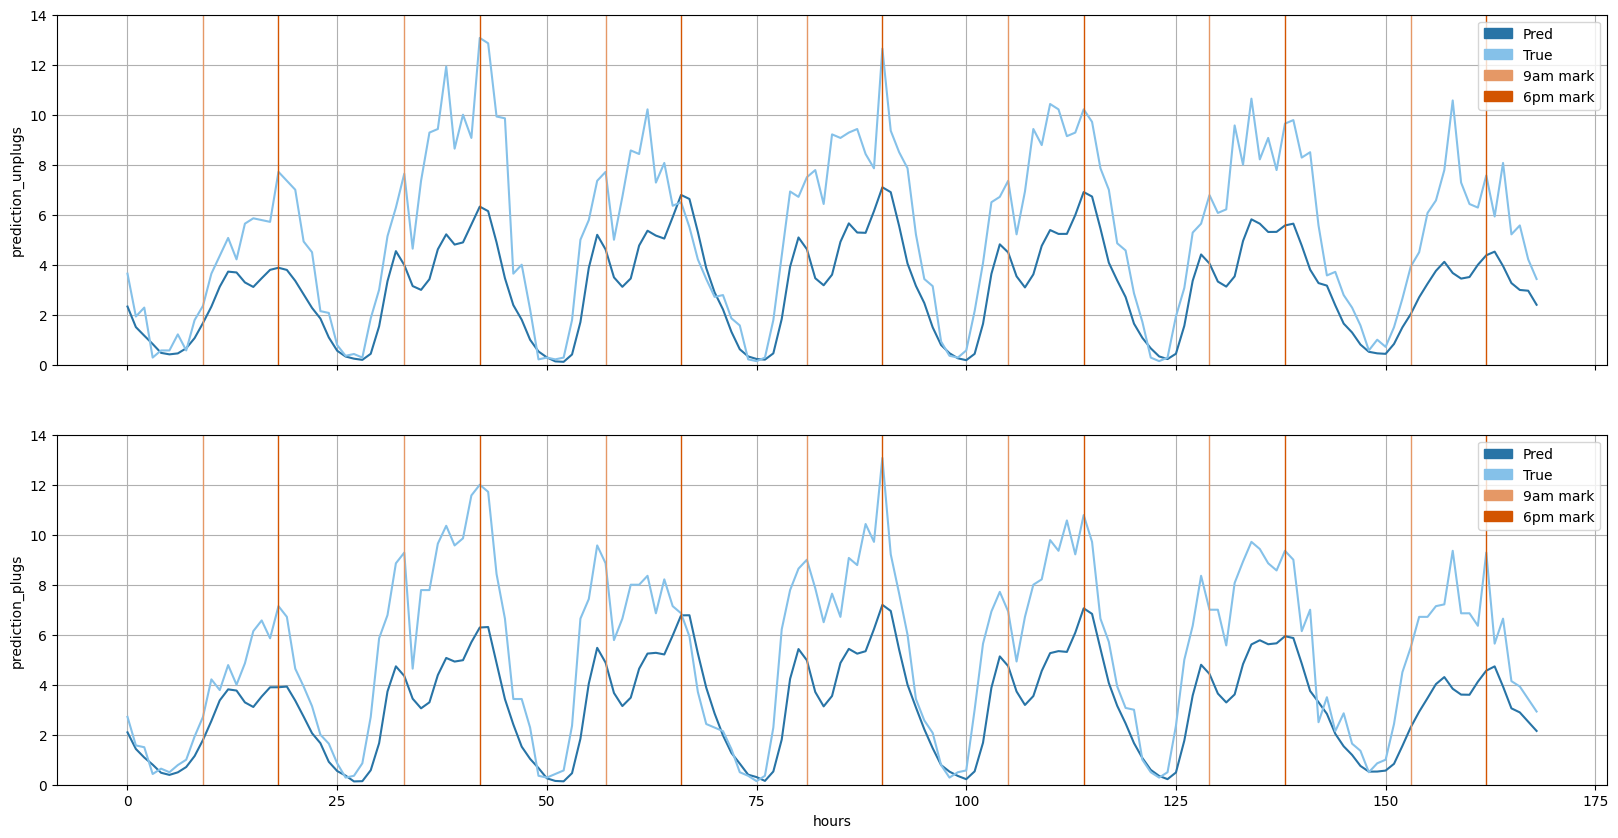

In [764]:
areas_zip = zip(names, areas)
for name,area in areas_zip:
    print(f"Name of the area: {name}")
    GNN_data_innova_area_filtered = filtering_stations_by_area(GNN_data_innova,area)
    print(f"Number of stations used: {GNN_data_innova_area_filtered['number'].nunique()}")
    GNN_data_innova_area_hour_aggregation = GNN_data_innova_area_filtered.groupby(by="time").mean().reset_index()[
        ["plugs_count","prediction_plugs","unplugs_count","prediction_unplugs","time"]]
    show_plugs_unplugs(GNN_data_innova_area_hour_aggregation,start_date=start_date_innova_test_set,end_date=end_date_innova_test_set,time_column="time",upper_y_lim=14)


### XGBoost

In [765]:
XGB_data_innova = pd.read_csv(os.path.join(results_path, "predictions_fixed_INNOVA_comparison_test.csv"))
column_name_changes = {
    "true_value_plugs":"plugs_count",
    "true_value_unplugs":"unplugs_count"
    }

XGB_data_innova = XGB_data_innova.rename(columns = column_name_changes)

#### Average over all stations

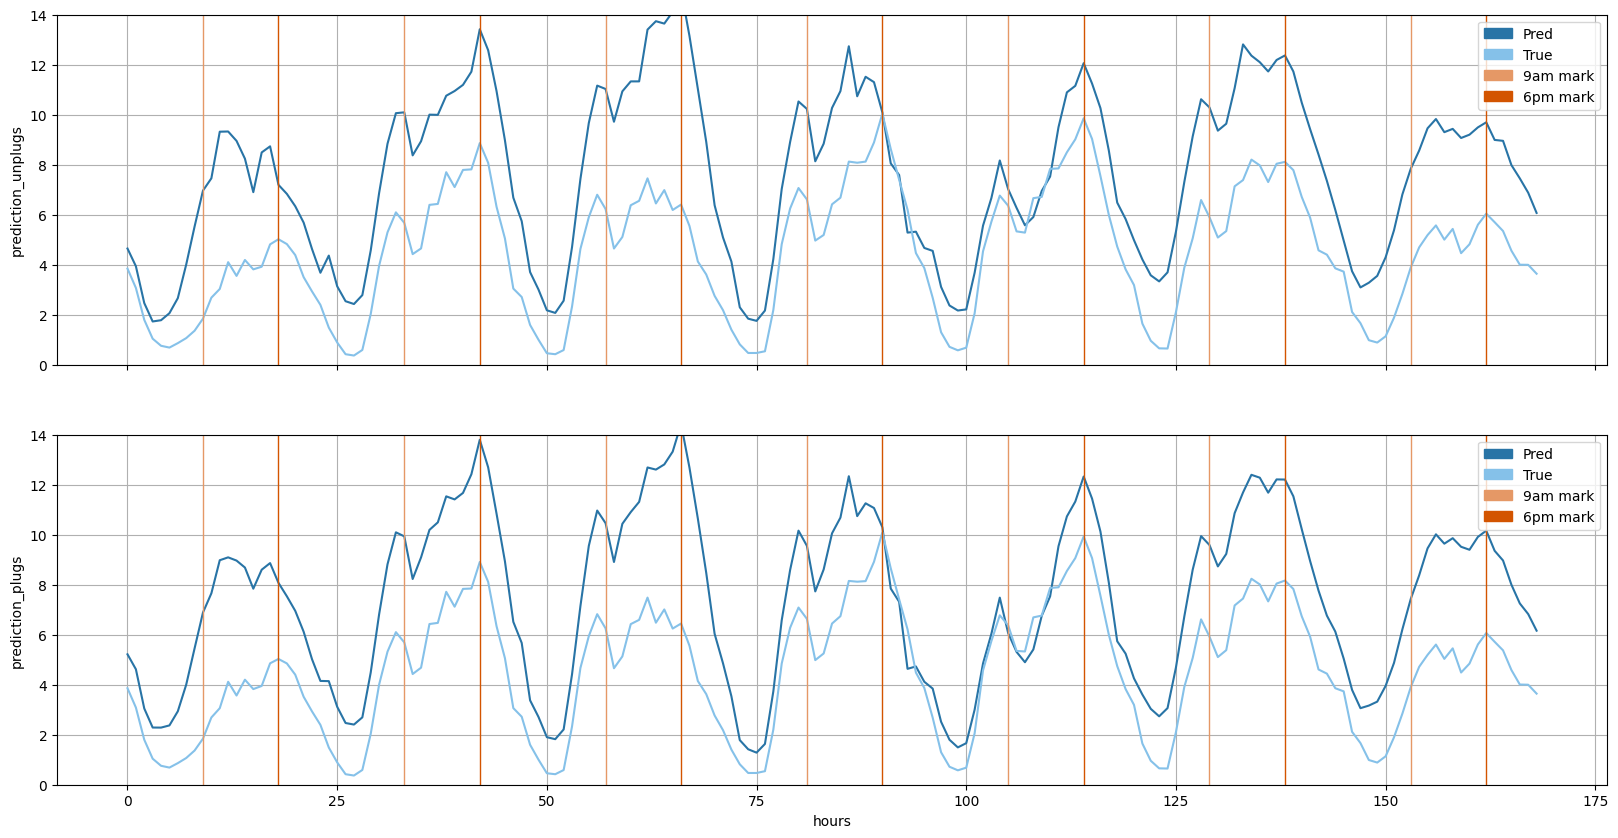

In [766]:
XGB_data_innova_hour_aggregation_overall = XGB_data_innova.groupby(by="time").mean().reset_index()[
    ['prediction_plugs', 'plugs_count','prediction_unplugs', 'unplugs_count',"time"]]
show_plugs_unplugs(XGB_data_innova_hour_aggregation_overall,start_date=start_date_innova_test_set,end_date=end_date_innova_test_set,time_column="time",upper_y_lim=14)

#### Specific areas

Name of the area: azca area
Number of stations used: 5


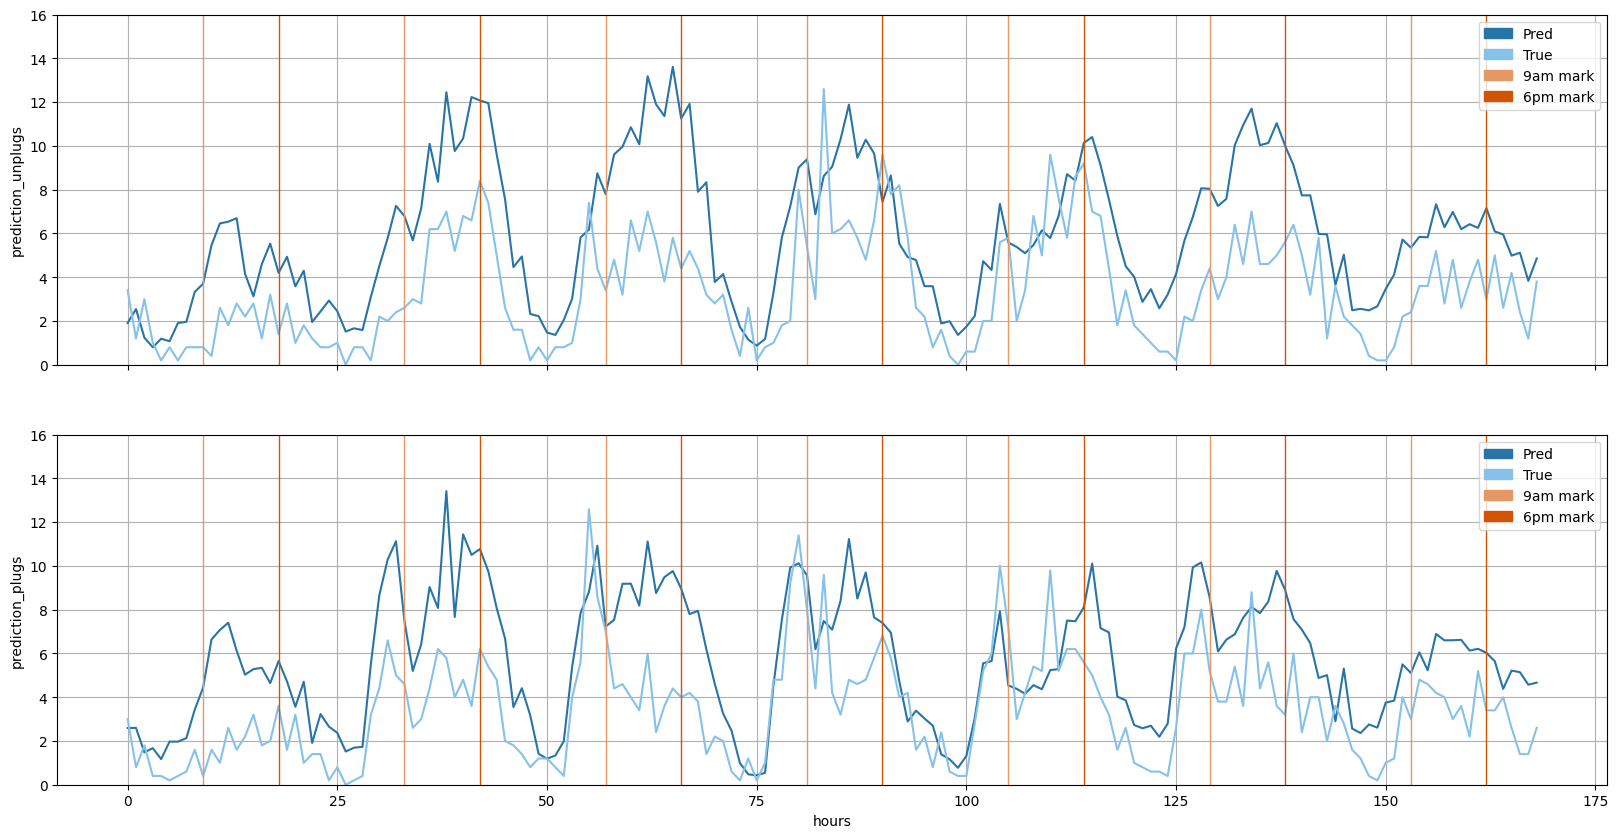

Name of the area: cuzco square area
Number of stations used: 2


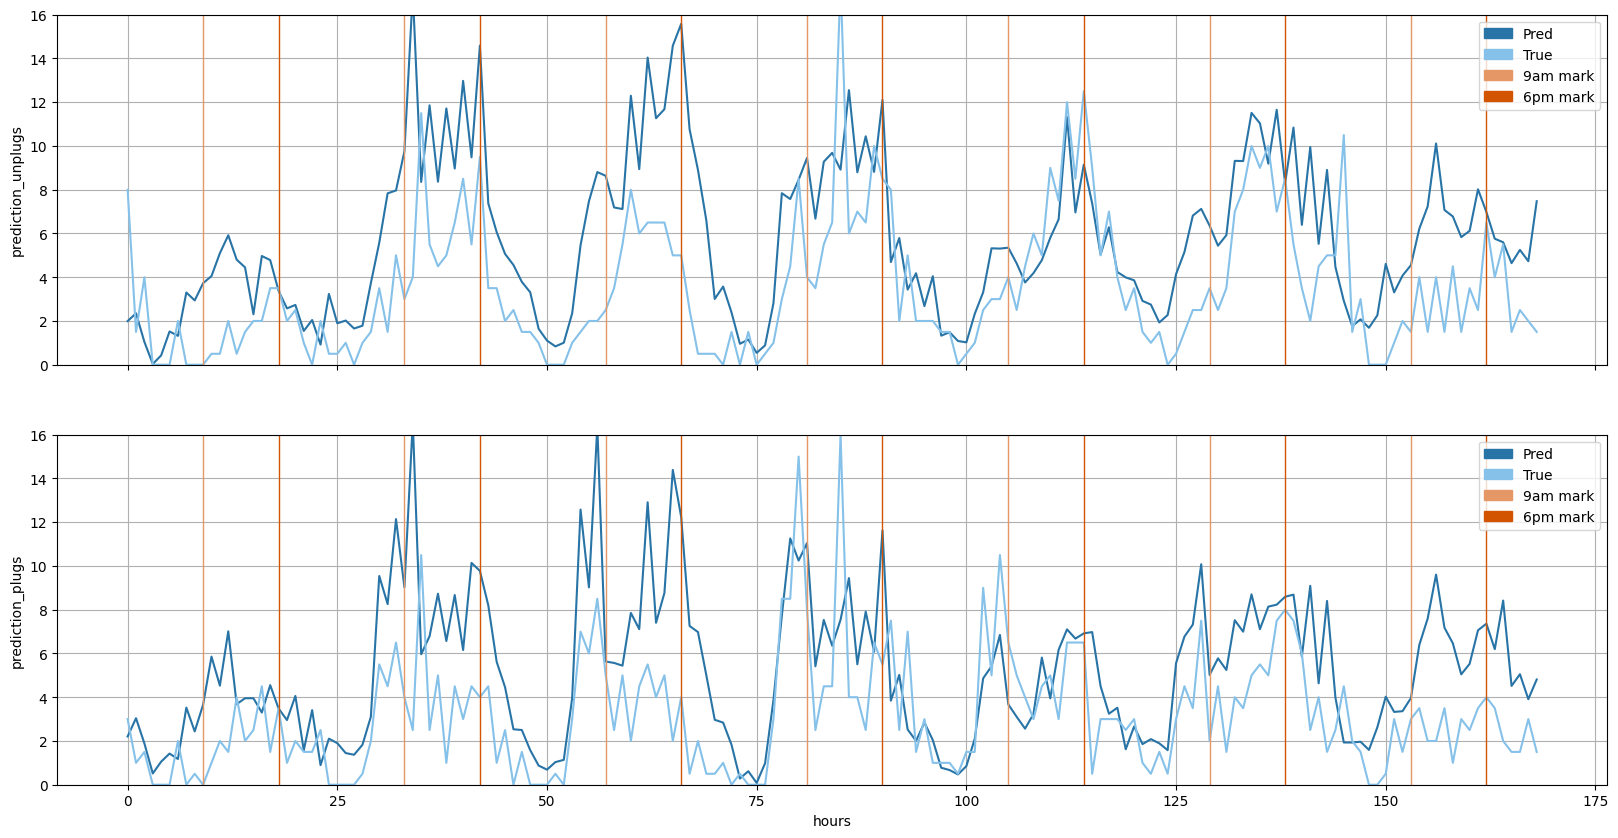

Name of the area: Chamberí
Number of stations used: 11


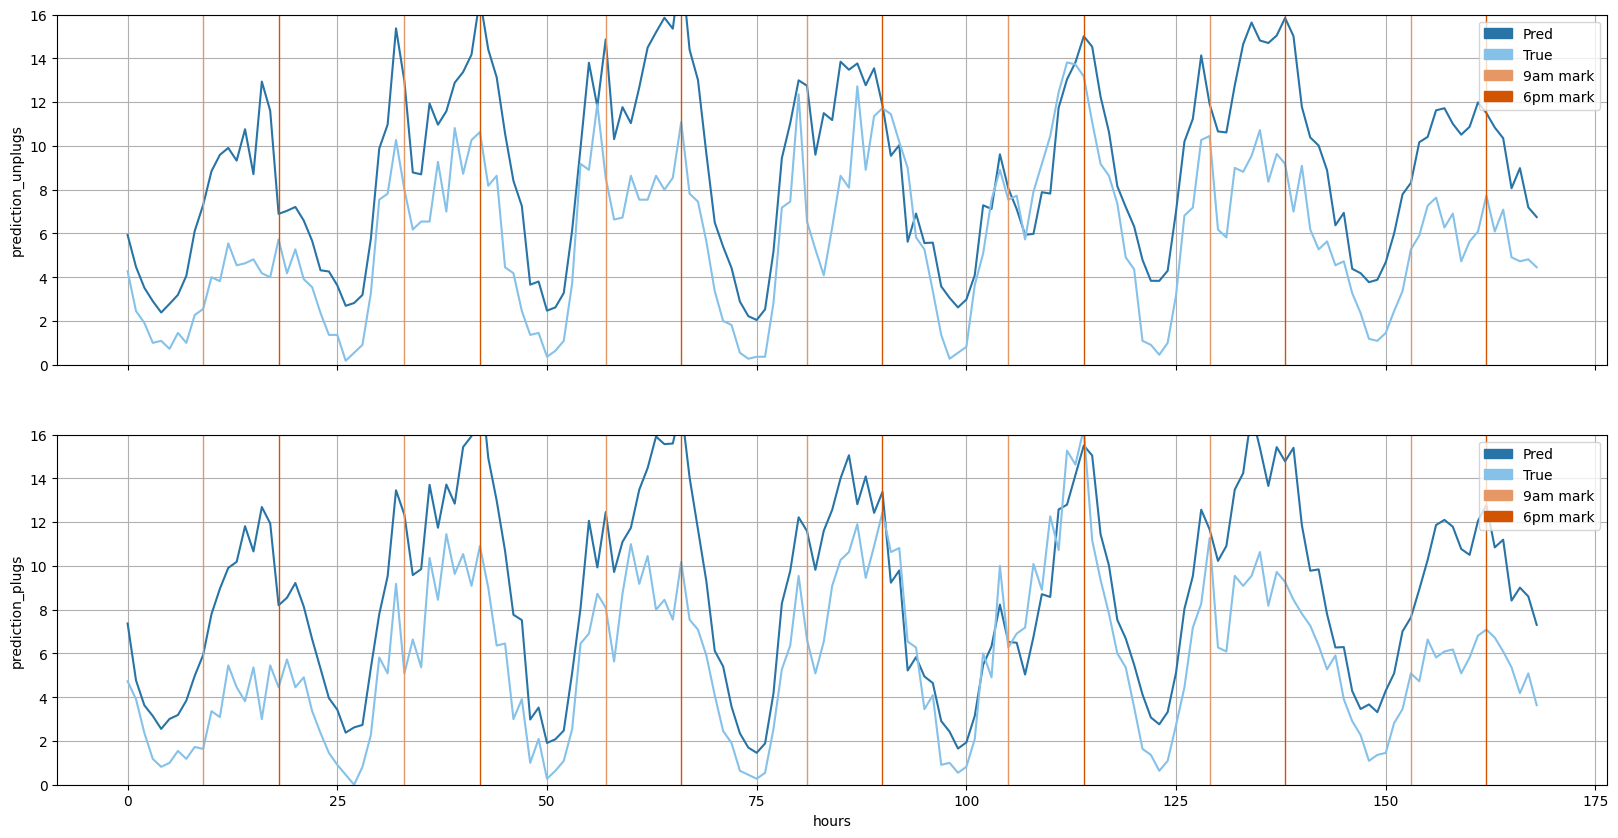

Name of the area: retiro park
Number of stations used: 15


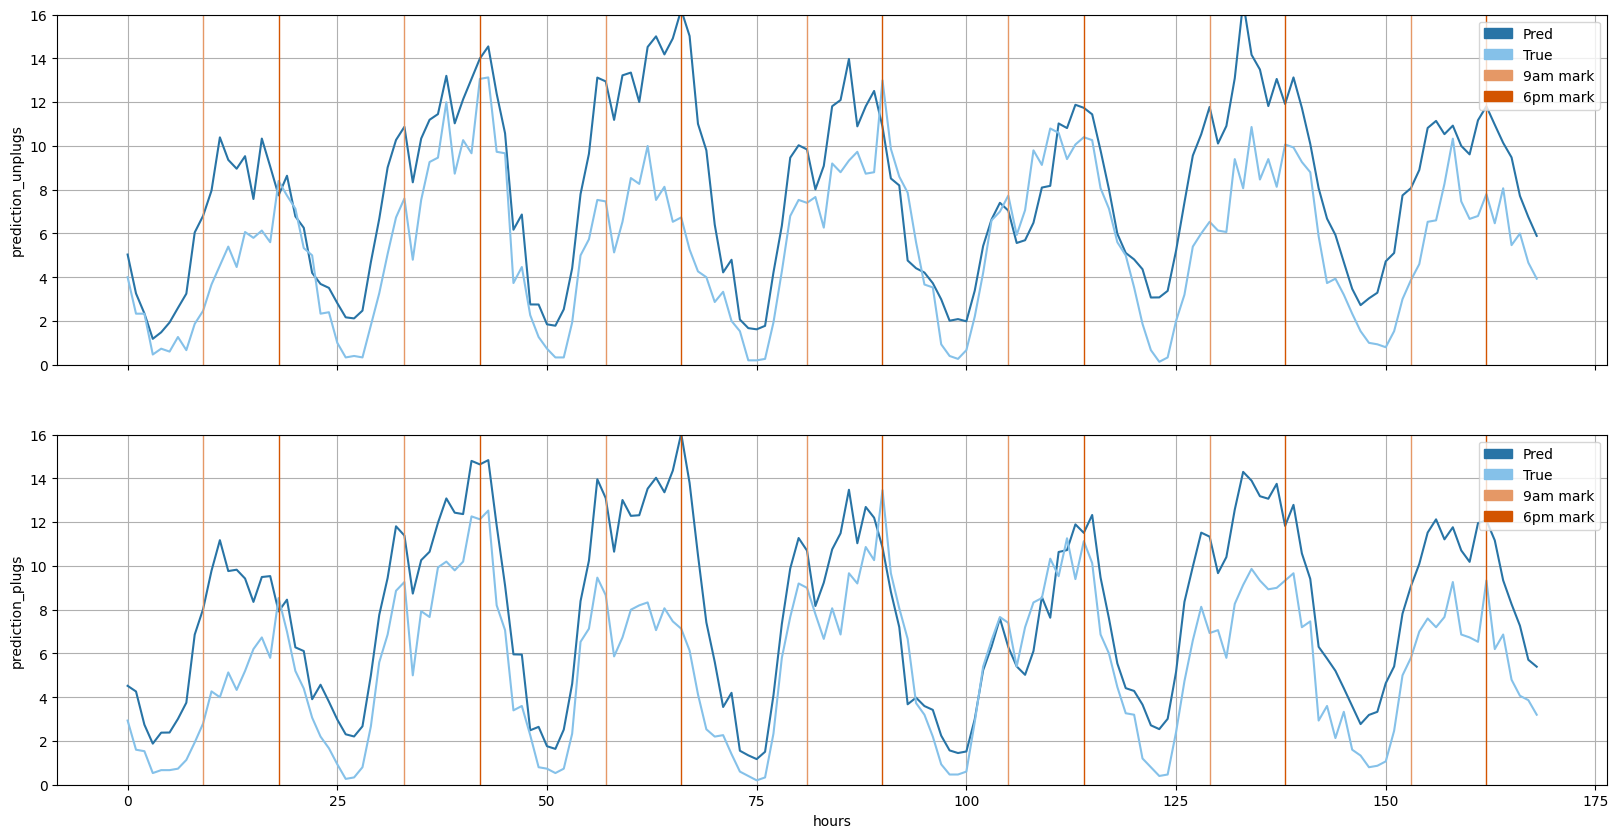

In [767]:
areas_zip = zip(names, areas)
for name,area in areas_zip:
    print(f"Name of the area: {name}")
    XGB_data_innova_area_filtered = filtering_stations_by_area(XGB_data_innova,area)
    print(f"Number of stations used: {XGB_data_innova_area_filtered['number'].nunique()}")
    XGB_data_innova_area_hour_aggregation = XGB_data_innova_area_filtered.groupby(by="time").mean().reset_index()[
        ["plugs_count","prediction_plugs","unplugs_count","prediction_unplugs","time"]]
    show_plugs_unplugs(XGB_data_innova_area_hour_aggregation,start_date=start_date_innova_test_set,end_date=end_date_innova_test_set,time_column="time",upper_y_lim=16)

## All 2022 visualizations

In [813]:
start_date_2022_all = dt.datetime(2022,1,2)
end_date_2022_all = dt.datetime(2022,12,31)

start_date_2022_winter = dt.datetime(2022,2,10)#thursday
end_date_2022_winter= dt.datetime(2022,2,17)#thursday

start_date_2022_spring= dt.datetime(2022,4,12)#tuesday
end_date_2022_spring= dt.datetime(2022,4,19)#tuesday

start_date_2022_summer= dt.datetime(2022,7,13)#wednesday
end_date_2022_summer= dt.datetime(2022,7,20)#wednesday

start_date_2022_rain= dt.datetime(2022,3,10)#thursday
end_date_2022_rain= dt.datetime(2022,3,17)#thursday

start_date_2022_hispanity_day = dt.datetime(2022,10,9)#sunday
end_date_2022_hispanity_day = dt.datetime(2022,10,16)#sunday

### GNN

In [814]:
GNN_data_2022 = pd.read_csv(os.path.join(results_path, "GNN_data_2022_with_predictions.csv"))
GNN_data_2022 = GNN_data_2022.dropna(how = "any")

#### Average over all stations, all time span

In [815]:
GNN_data_2022["time"] = pd.to_datetime(GNN_data_2022["time"])

In [816]:
GNN_data_2022["day"] = GNN_data_2022["time"].apply(lambda row: row.day)
GNN_data_2022["month"] = GNN_data_2022["time"].apply(lambda row: row.month)

In [817]:
GNN_data_2022_day_aggregation = GNN_data_2022[['prediction_plugs', 'plugs_count','prediction_unplugs', 'unplugs_count',"day","month","year"]].groupby(['day', 'month', 'year']).sum().reset_index()
GNN_data_2022_day_aggregation["week_number"]=GNN_data_2022_day_aggregation.apply(lambda row: dt.date(int(row["year"]), int(row["month"]), int(row["day"])).isocalendar().week, axis = 1)

daily_plugs_wn = GNN_data_2022_day_aggregation.groupby(["year", "week_number"]).agg({'plugs_count': 'mean',"prediction_plugs":"mean", "prediction_unplugs":"mean",'unplugs_count': 'mean'}).reset_index()
daily_plugs_wn['time'] = pd.to_datetime(daily_plugs_wn['year'].astype(str) + '-W' + daily_plugs_wn['week_number'].astype(str) + '-1', format='%Y-W%W-%w')

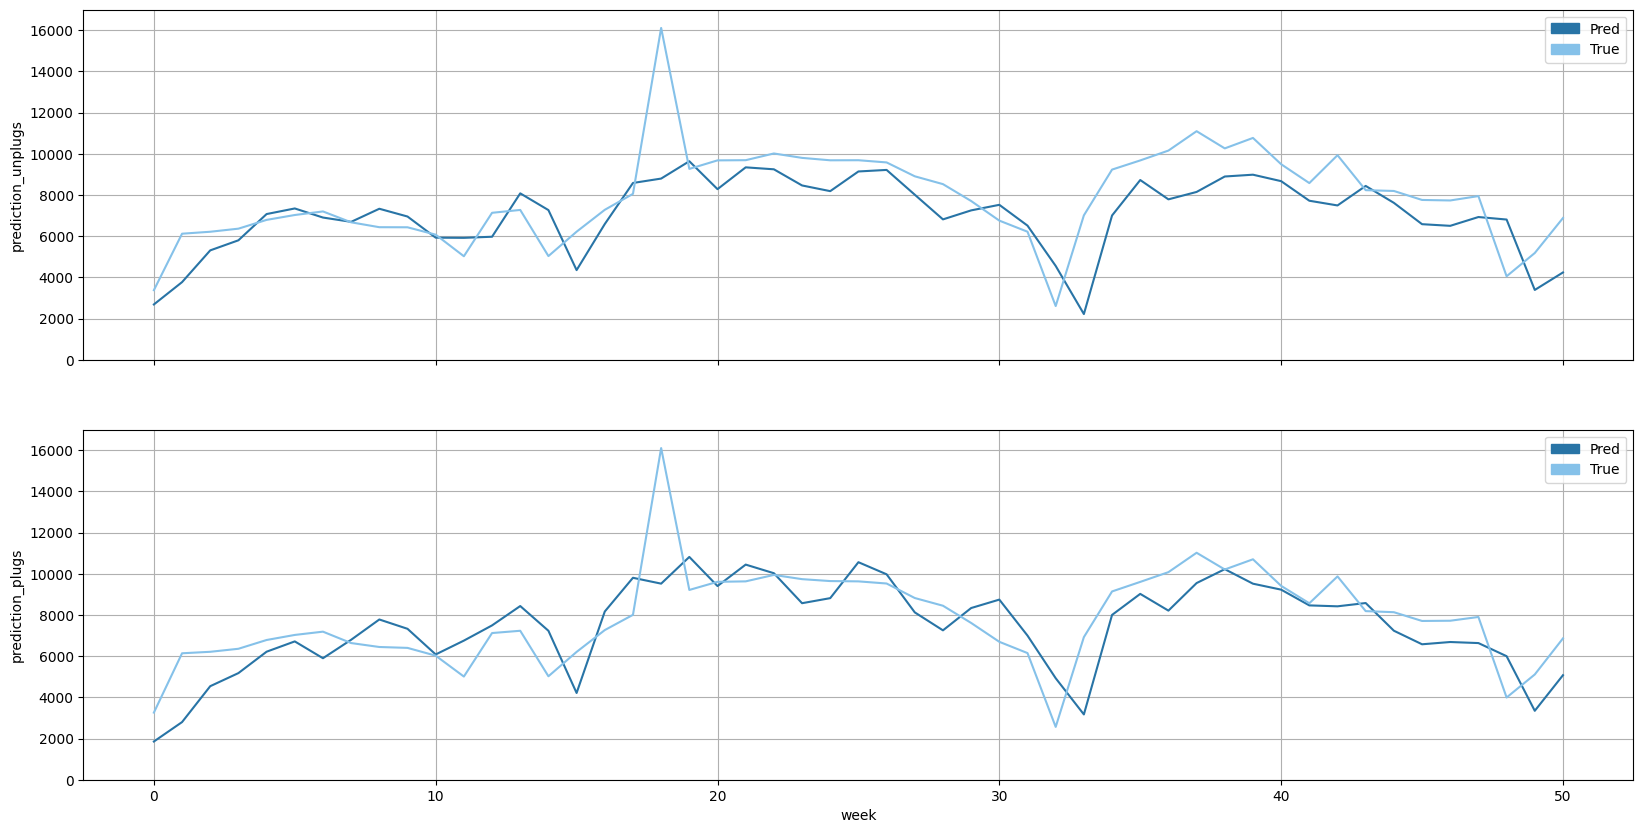

In [818]:
show_plugs_unplugs(daily_plugs_wn,start_date=start_date_2022_all,end_date=end_date_2022_all,time_column="time",upper_y_lim=17000, peak_hours=False, xlabel="week")

#### Impact of weather in predictions

In [819]:
GNN_data_2022.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'activate', 'name', 'reservations_count',
       'total_bases', 'free_bases', 'number', 'no_available', 'address',
       'dock_bikes', 'id_station', 'time', 'year', 'plugs_count',
       'unplugs_count', 'latitude', 'longitude', '83', '86', '87', '88', '89',
       'dia_semana', 'work_day_indicator', 'covid_indicator', 'index',
       'year_week_index', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos',
       'week_of_year_sin', 'week_of_year_cos', 'wind_cos', 'wind_sin',
       'light0', 'light1', 'light2', 'light3', 'prediction_plugs',
       'true_value_plugs', 'prediction_unplugs', 'true_value_unplugs',
       'prediction_plugs_weather_lagged', 'true_value_plugs_weather_lagged',
       'prediction_unplugs_weather_lagged',
       'true_value_unplugs_weather_lagged', 'day', 'month'],
      dtype='object')

In [820]:
GNN_data_2022_weather = GNN_data_2022[['prediction_plugs',"prediction_plugs_weather_lagged", 'plugs_count','prediction_unplugs',"prediction_unplugs_weather_lagged", 'unplugs_count',"83","89","time"]]  
GNN_data_2022_weather_grouped = GNN_data_2022_weather.groupby("time").mean().reset_index()

##### Does the model improve when intruducing next week weather forecasting?

##### Temperature (comparing winter, spring and summer)

###### Summer

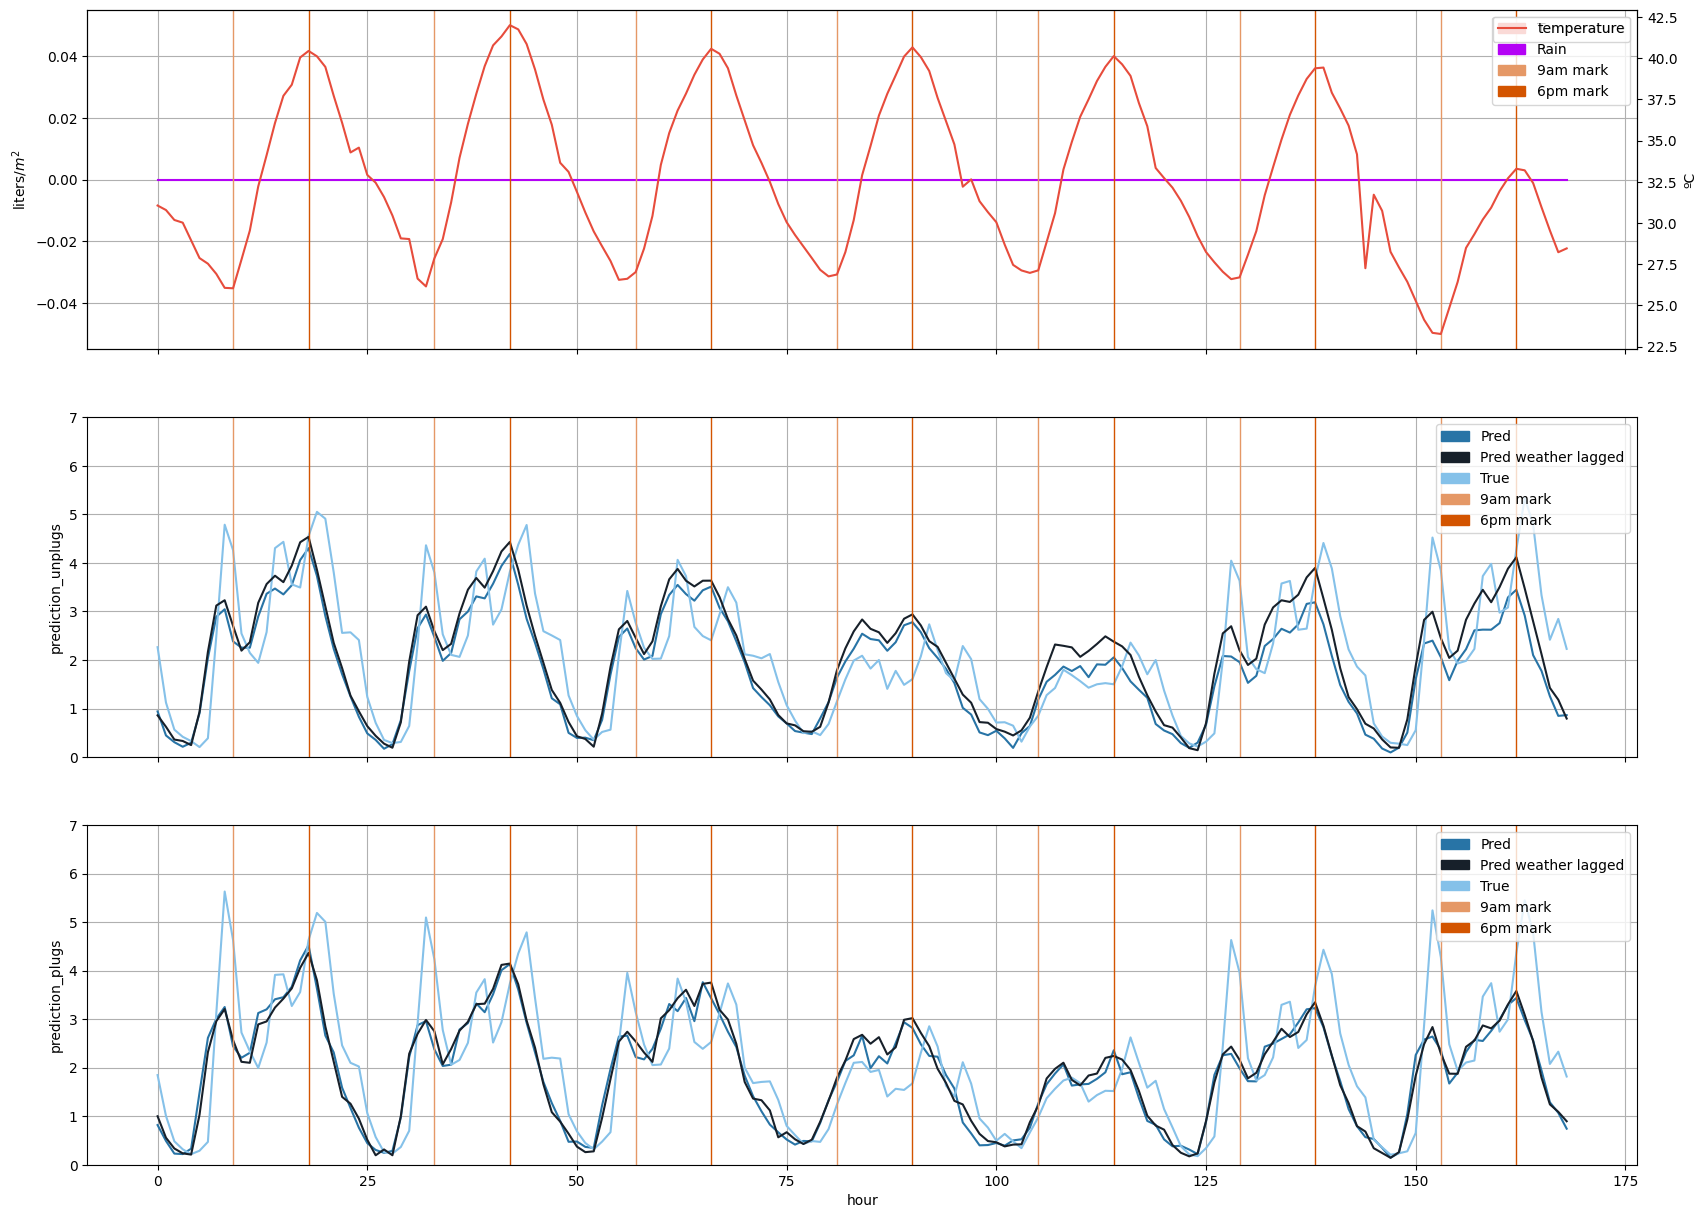

In [821]:
show_plugs_unplugs_weather(GNN_data_2022_weather_grouped,start_date=start_date_2022_summer,end_date=end_date_2022_summer,time_column="time",upper_y_lim=7,weather_lagged=True, peak_hours = True)

###### Spring

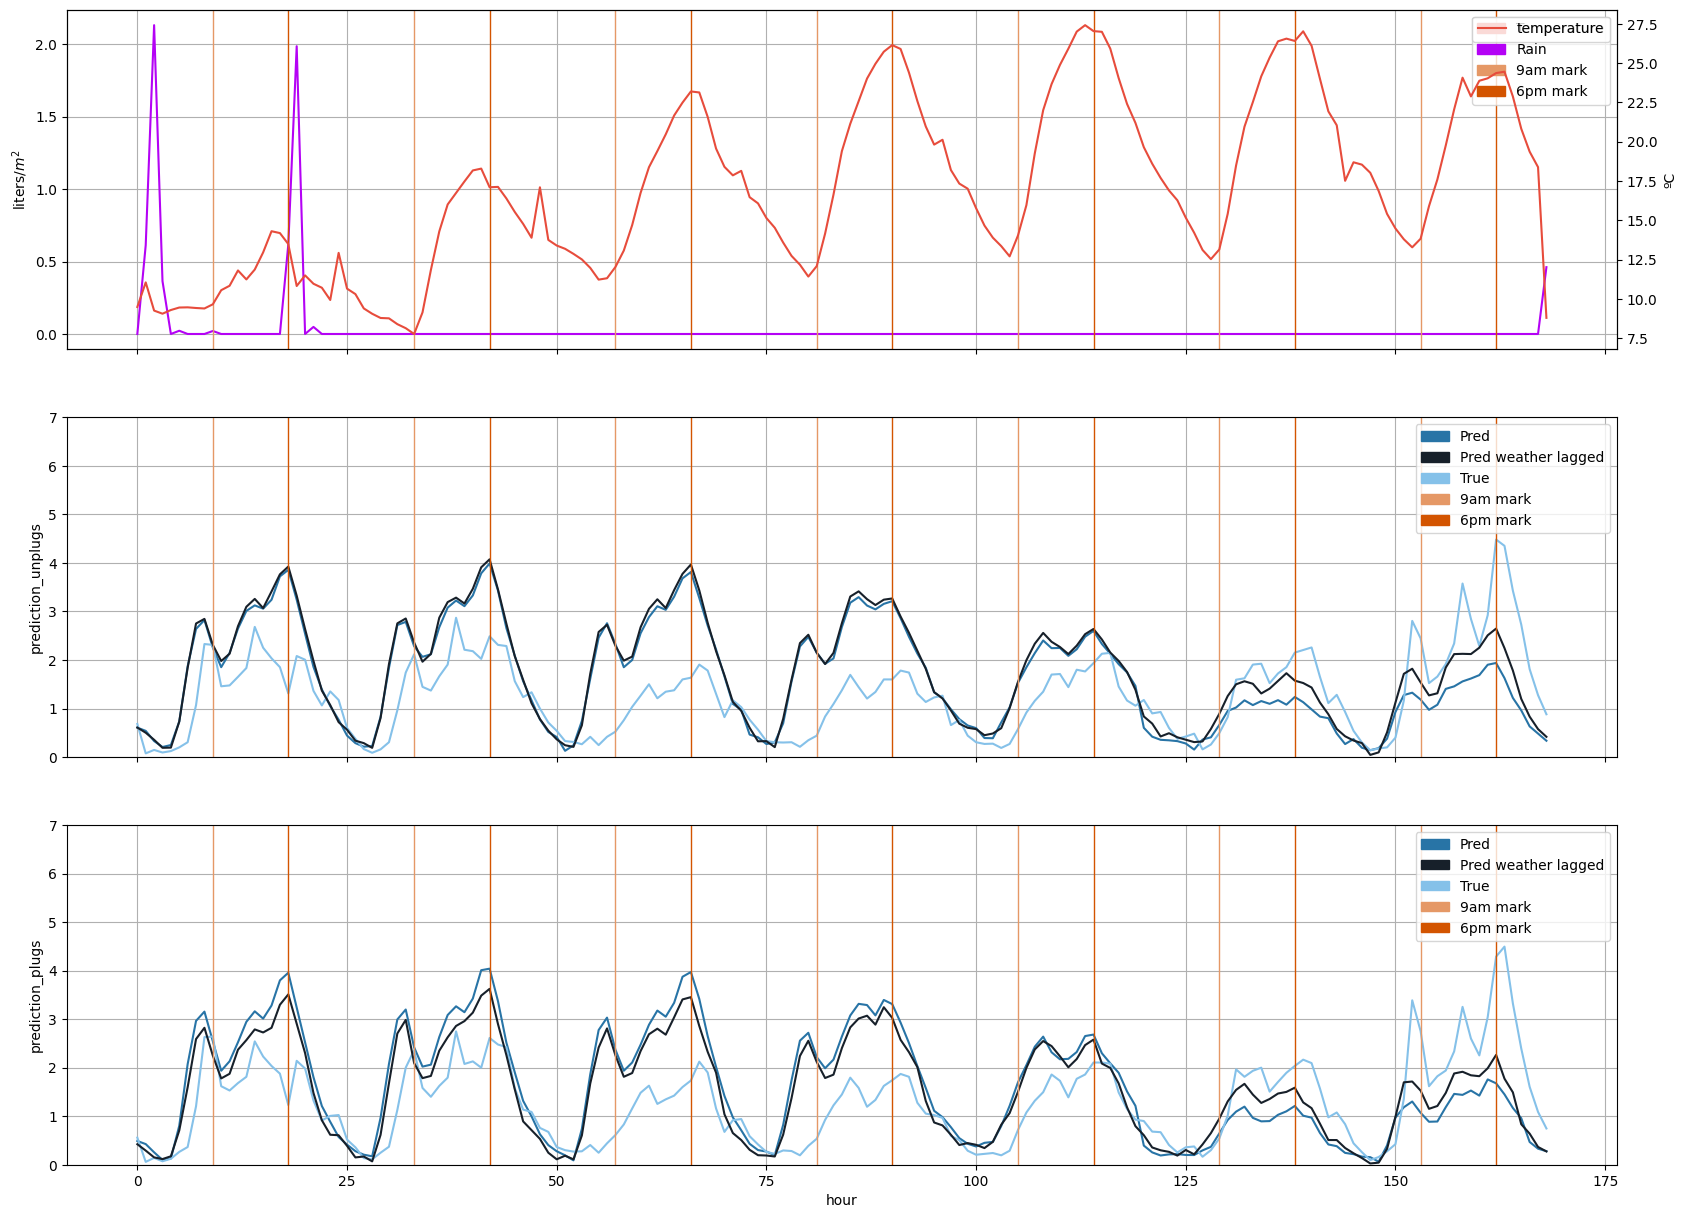

In [822]:
show_plugs_unplugs_weather(GNN_data_2022_weather_grouped,start_date=start_date_2022_spring,end_date=end_date_2022_spring,time_column="time",upper_y_lim=7,weather_lagged=True, peak_hours = True)

###### Winter

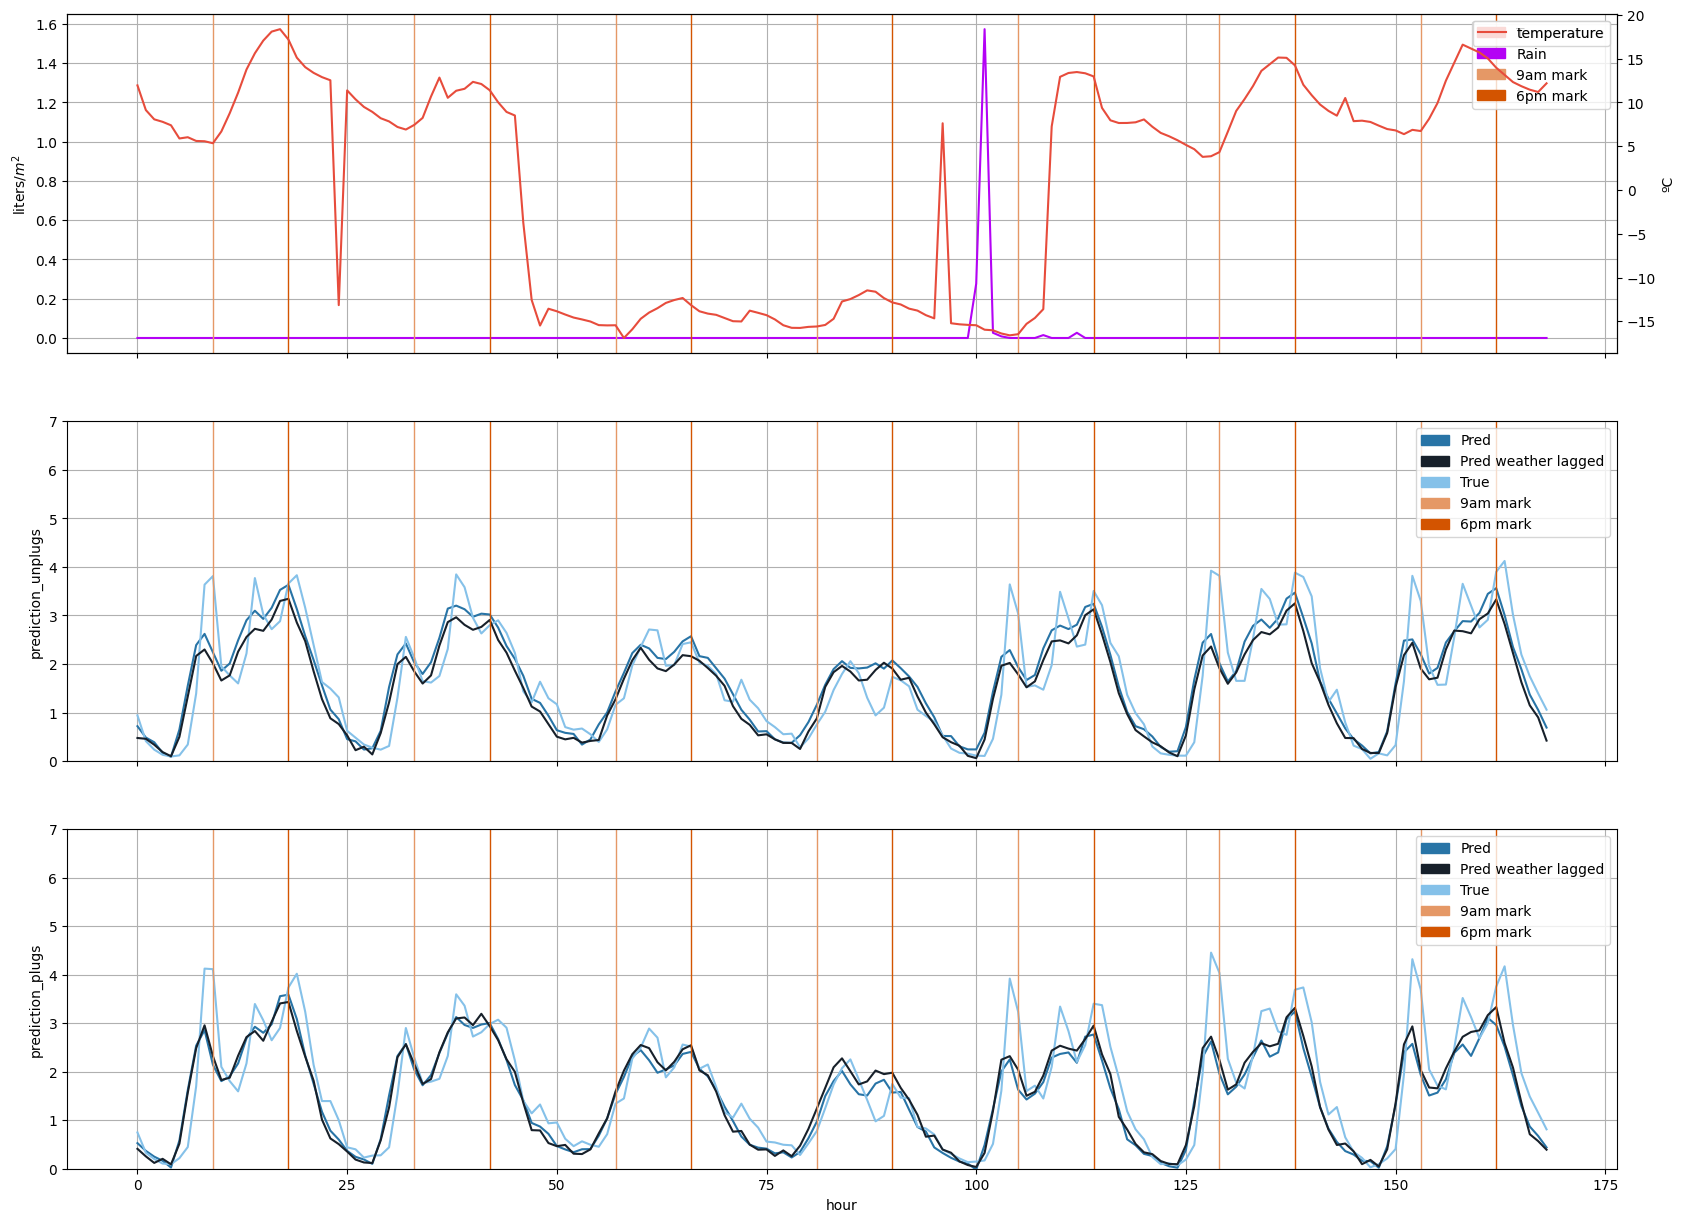

In [823]:
show_plugs_unplugs_weather(GNN_data_2022_weather_grouped,start_date=start_date_2022_winter,end_date=end_date_2022_winter,time_column="time",upper_y_lim=7,weather_lagged=True, peak_hours = True)

##### Rain

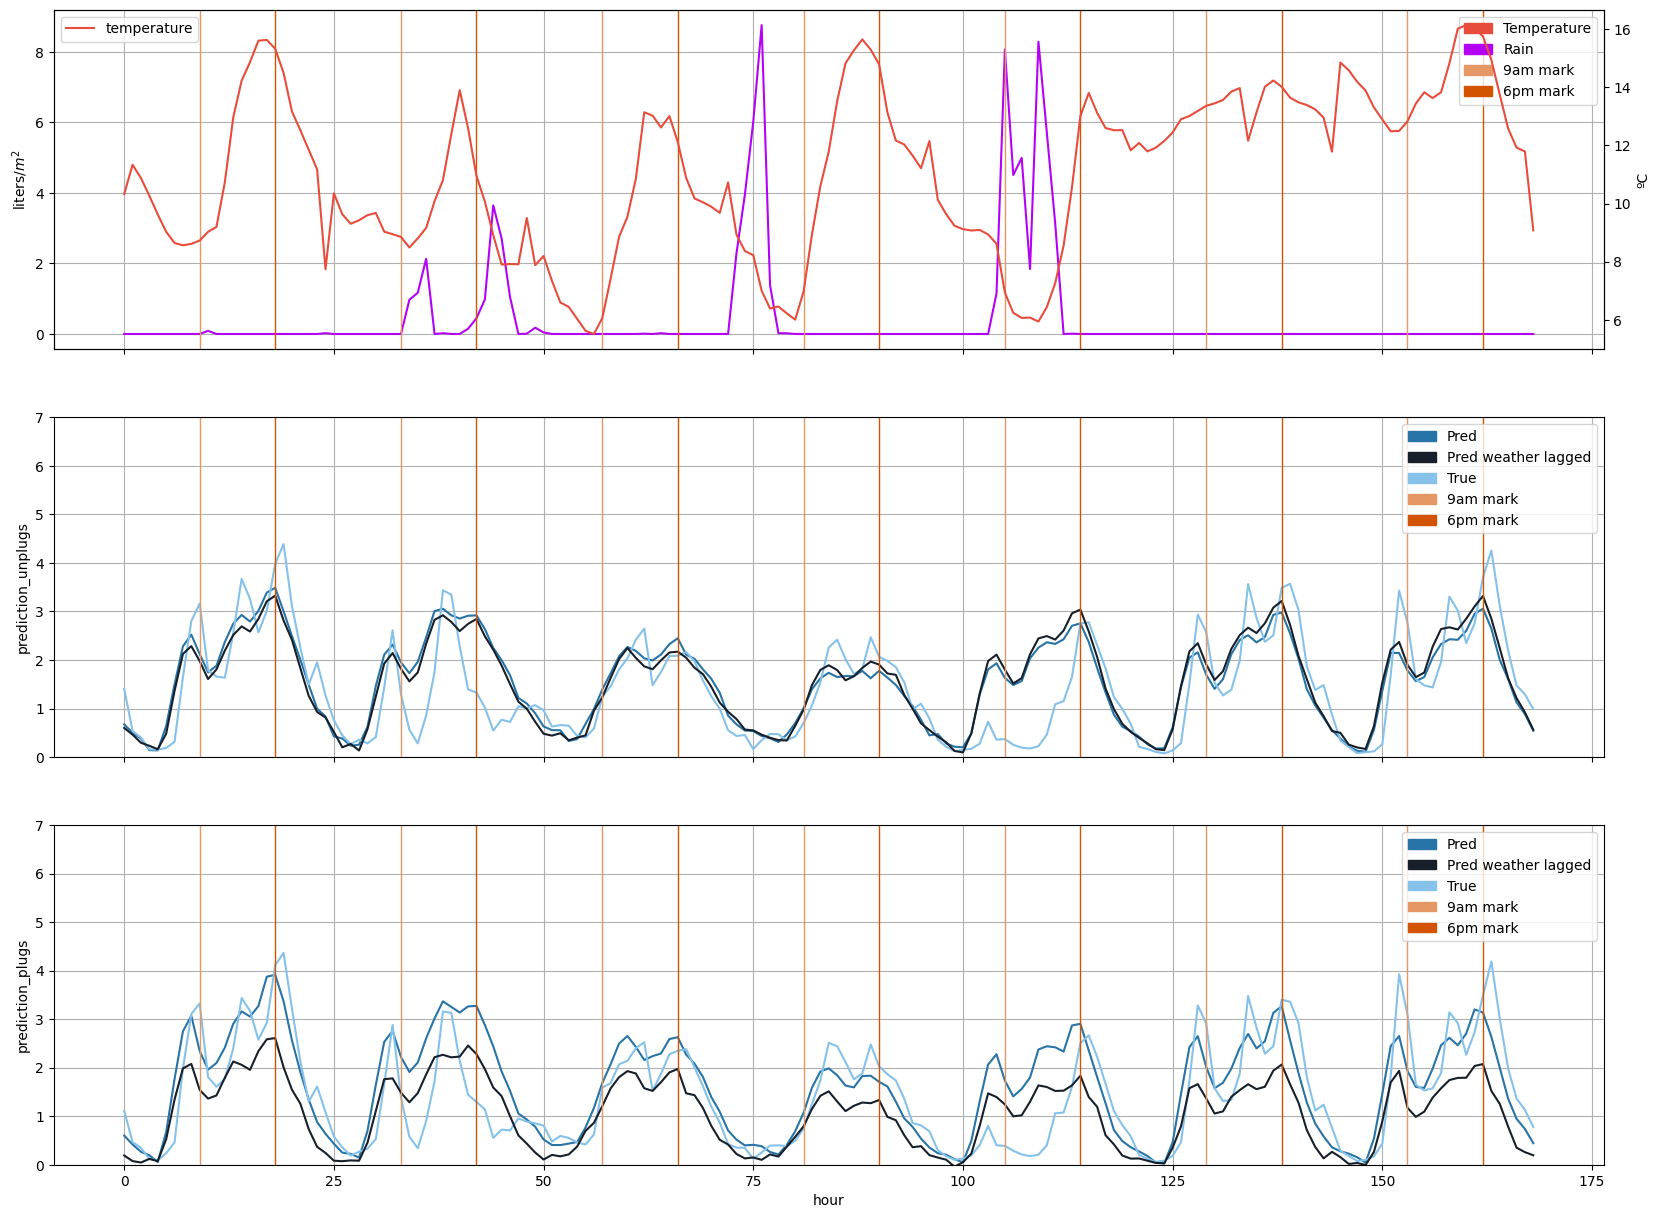

In [824]:
show_plugs_unplugs_weather(GNN_data_2022_weather_grouped,start_date=start_date_2022_rain,end_date=end_date_2022_rain,time_column="time",upper_y_lim=7,weather_lagged=True, peak_hours = True)

#### How does the model behave in front of holidays?

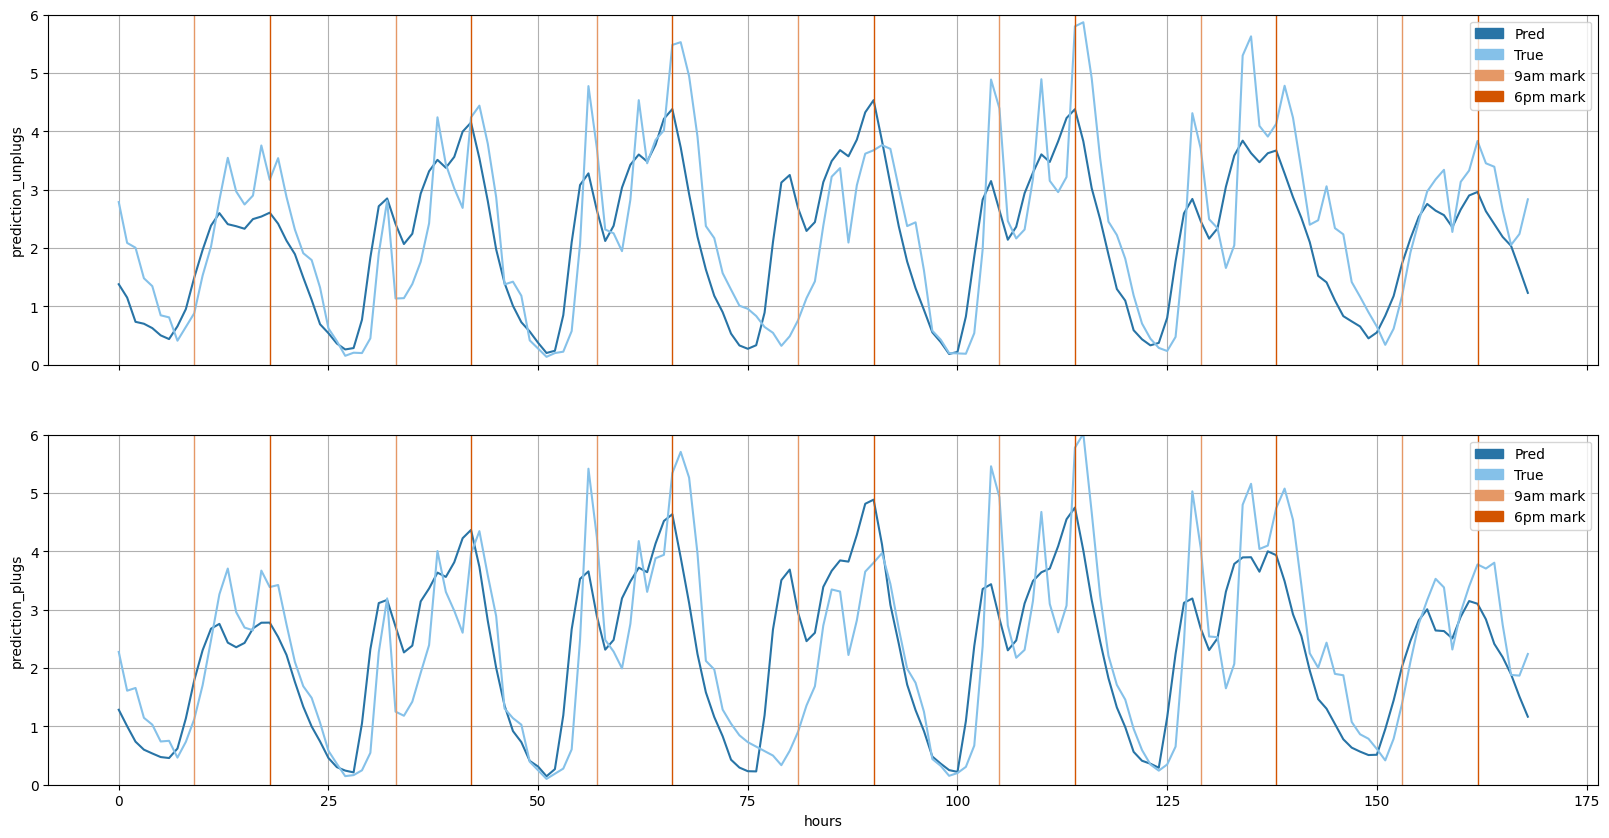

In [825]:
show_plugs_unplugs(GNN_data_2022_weather_grouped,start_date=start_date_2022_hispanity_day,end_date=end_date_2022_hispanity_day,time_column="time",upper_y_lim=6)

### XGBoost

In [828]:
XGB_data_2022 = pd.read_csv(os.path.join(results_path, "predictions_fixed_all_of_2022_test.csv"))
column_name_changes = {
    "true_value_plugs":"plugs_count",
    "true_value_unplugs":"unplugs_count"
    }

XGB_data_2022 = XGB_data_2022.rename(columns = column_name_changes)

#### Average over all stations, all time span

In [829]:
XGB_data_2022["time"] = pd.to_datetime(XGB_data_2022["time"])

In [830]:
XGB_data_2022["day"] = XGB_data_2022["time"].apply(lambda row: row.day)
XGB_data_2022["month"] = XGB_data_2022["time"].apply(lambda row: row.month)

In [831]:
XGB_data_2022_day_aggregation = XGB_data_2022[['prediction_plugs', 'plugs_count','prediction_unplugs', 'unplugs_count',"day","month","year"]].groupby(['day', 'month', 'year']).sum().reset_index()
XGB_data_2022_day_aggregation["week_number"]=XGB_data_2022_day_aggregation.apply(lambda row: dt.date(int(row["year"]), int(row["month"]), int(row["day"])).isocalendar().week, axis = 1)

daily_plugs_wn = XGB_data_2022_day_aggregation.groupby(["year", "week_number"]).agg({'plugs_count': 'mean',"prediction_plugs":"mean", "prediction_unplugs":"mean",'unplugs_count': 'mean'}).reset_index()
daily_plugs_wn['time'] = pd.to_datetime(daily_plugs_wn['year'].astype(str) + '-W' + daily_plugs_wn['week_number'].astype(str) + '-1', format='%Y-W%W-%w')

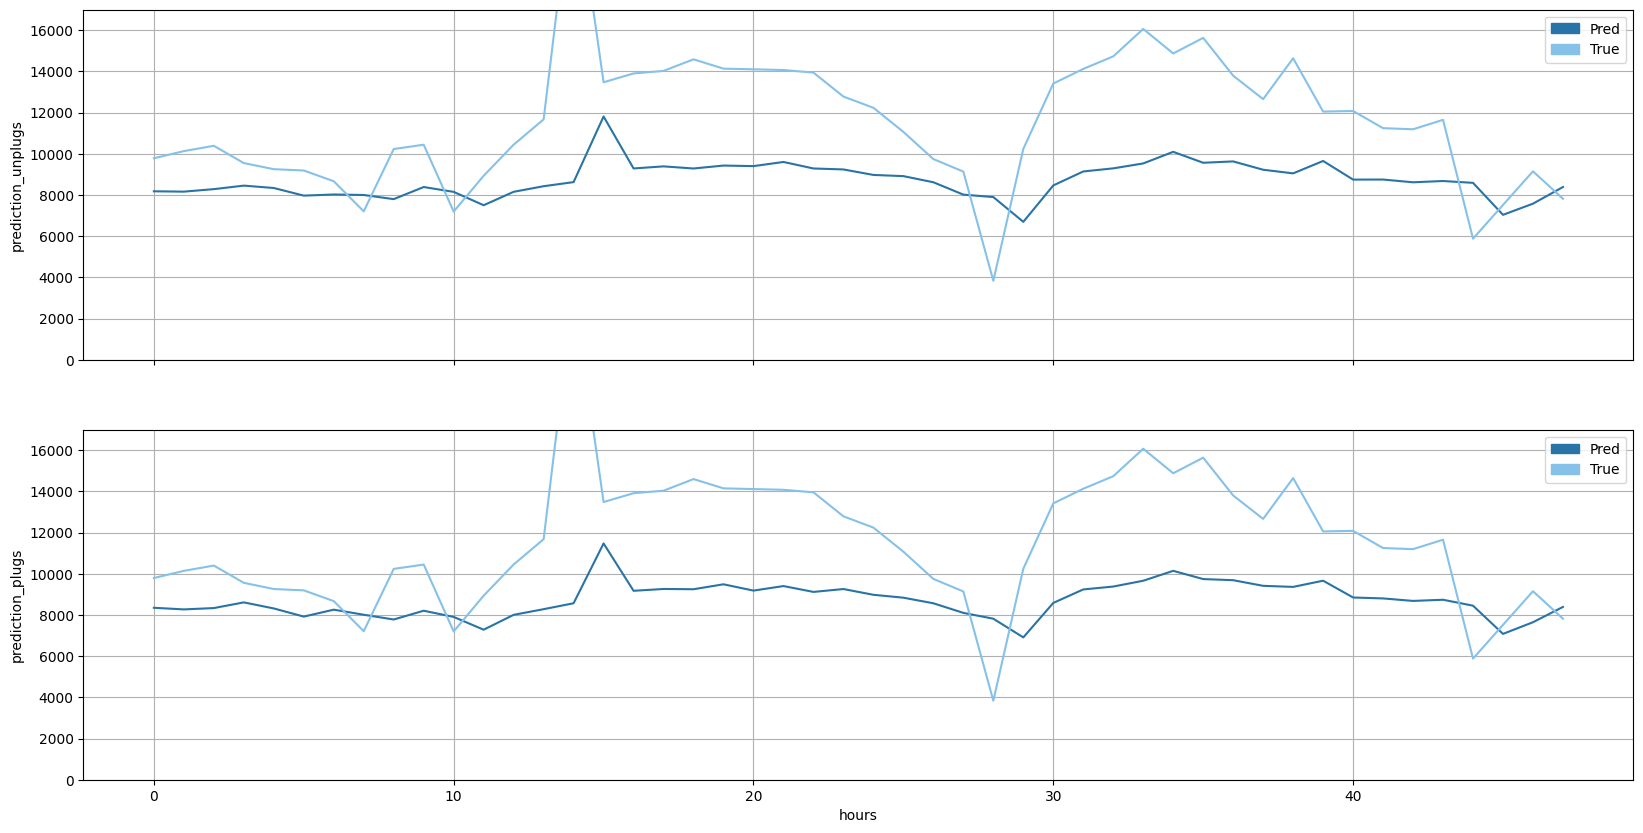

In [832]:
show_plugs_unplugs(daily_plugs_wn,start_date=start_date_2022_all,end_date=end_date_2022_all,time_column="time",upper_y_lim=17000, peak_hours=False)

#### Impact of weather in predictions

In [833]:
XGB_data_2022_weather = XGB_data_2022[['prediction_plugs', 'plugs_count','prediction_unplugs', 'unplugs_count',"83","89","time"]]  
XGB_data_2022_weather_grouped = XGB_data_2022_weather.groupby("time").mean().reset_index()

##### Temperature (comparing winter, spring and summer)

###### Summer

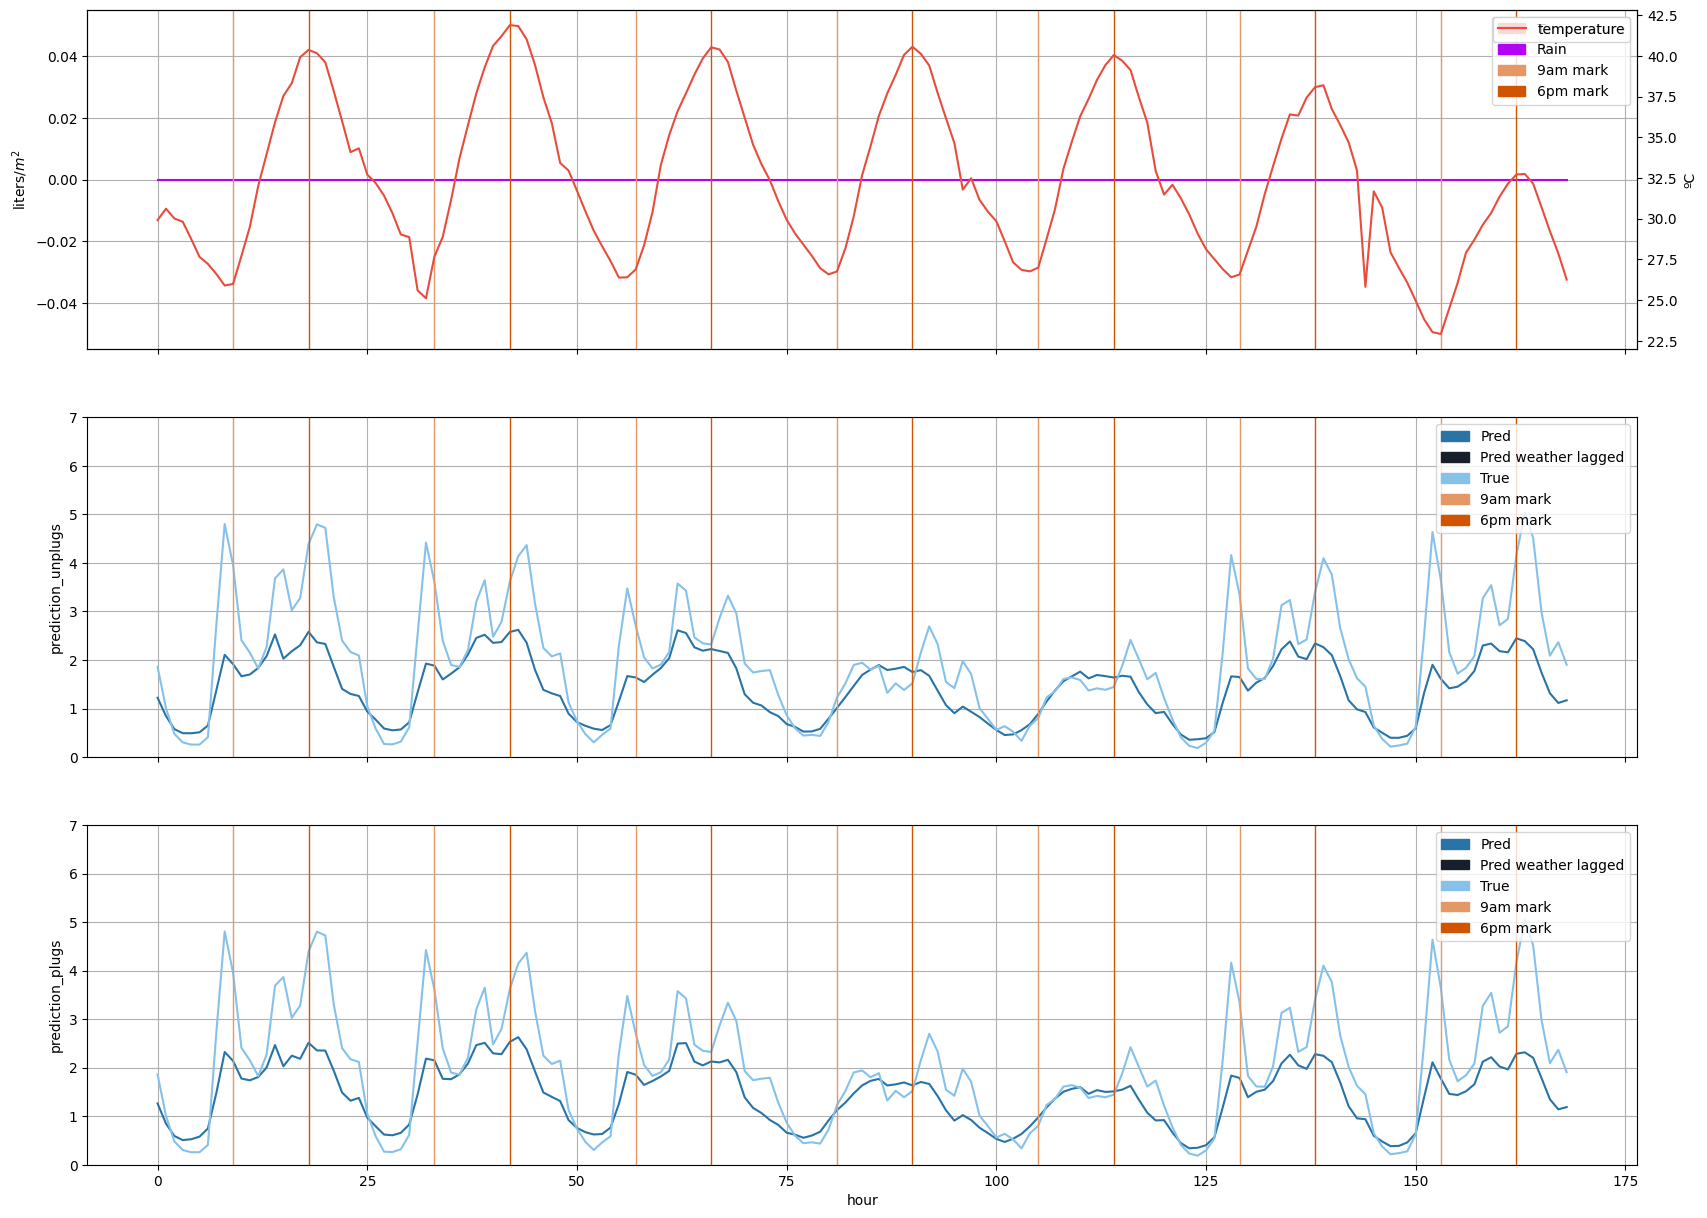

In [834]:
show_plugs_unplugs_weather(XGB_data_2022_weather_grouped,start_date=start_date_2022_summer,end_date=end_date_2022_summer,time_column="time",upper_y_lim=7, peak_hours = True)

###### Spring

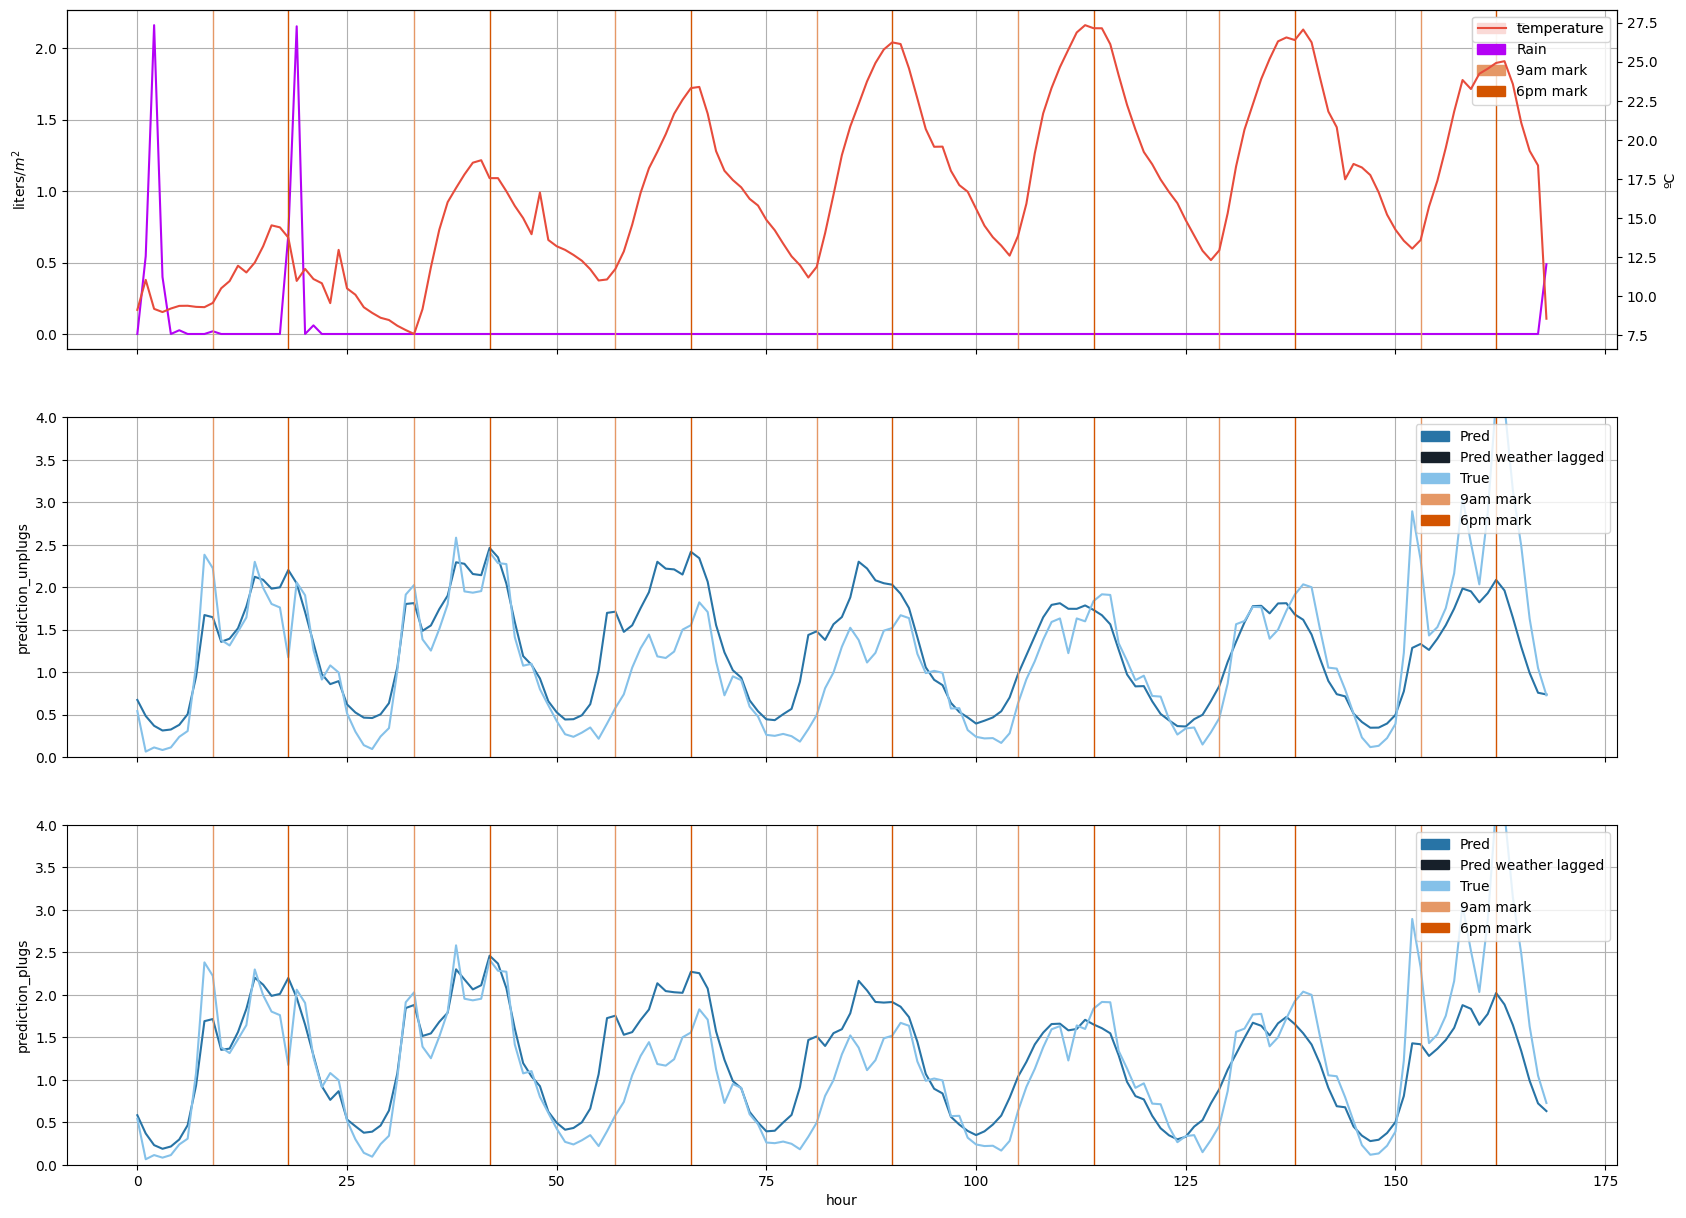

In [835]:
show_plugs_unplugs_weather(XGB_data_2022_weather_grouped,start_date=start_date_2022_spring,end_date=end_date_2022_spring,time_column="time",upper_y_lim=4, peak_hours = True)

###### Winter

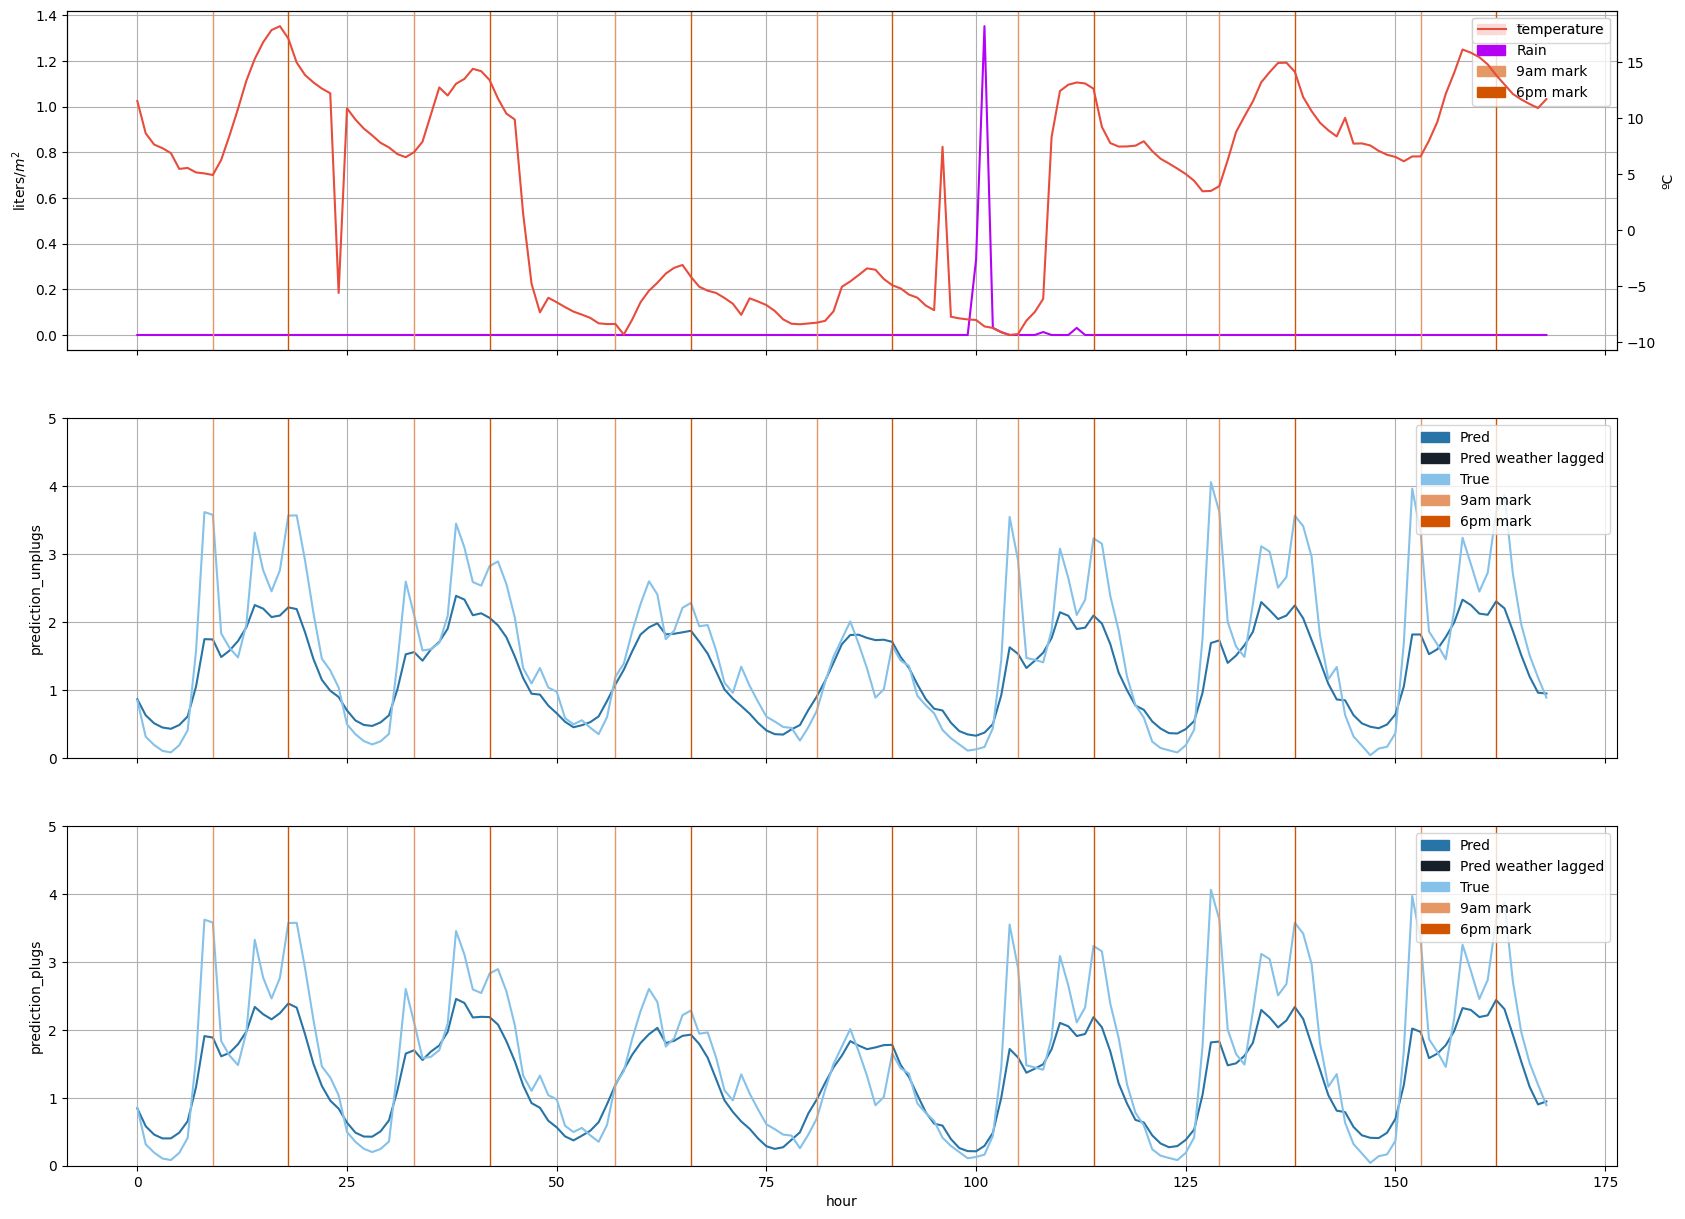

In [836]:
show_plugs_unplugs_weather(XGB_data_2022_weather_grouped,start_date=start_date_2022_winter,end_date=end_date_2022_winter,time_column="time",upper_y_lim=5, peak_hours = True)

##### Rain

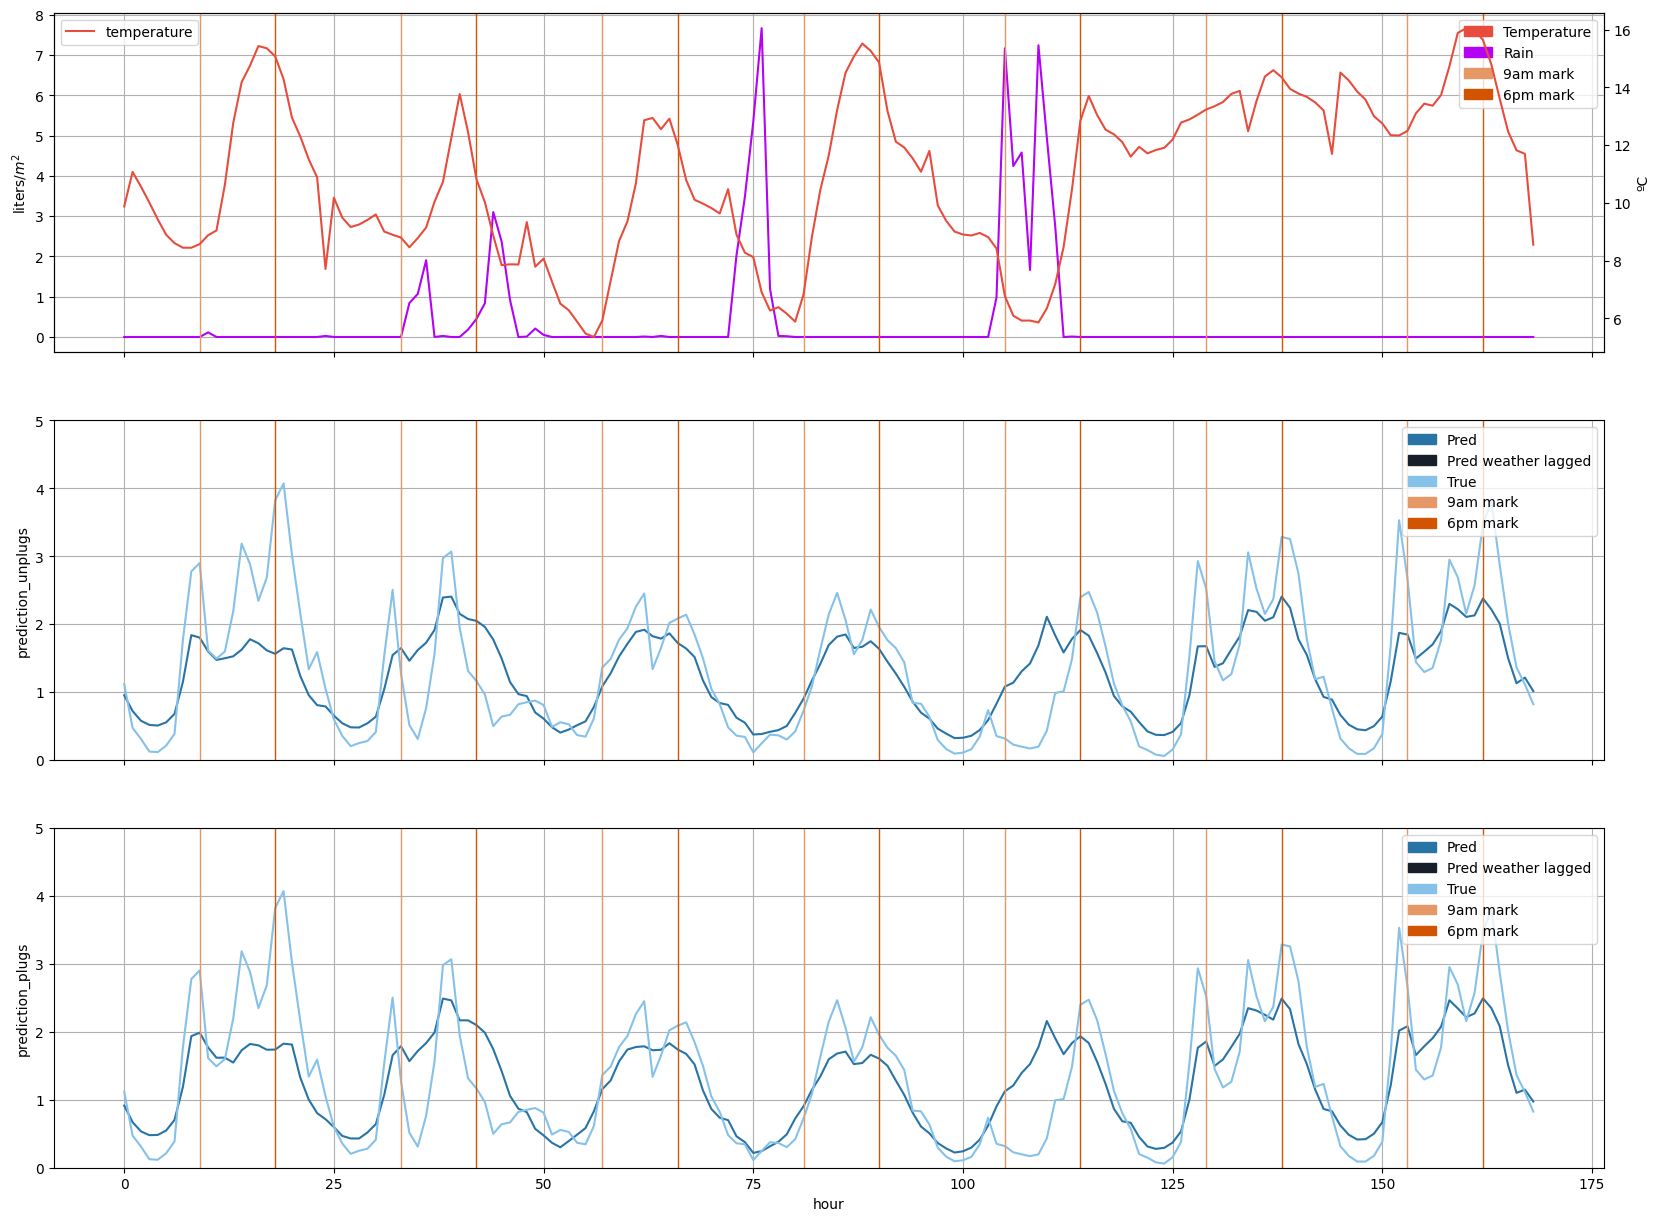

In [837]:
show_plugs_unplugs_weather(XGB_data_2022_weather_grouped,start_date=start_date_2022_rain,end_date=end_date_2022_rain,time_column="time",upper_y_lim=5, peak_hours = True)

#### How does the model behave in front of holidays?

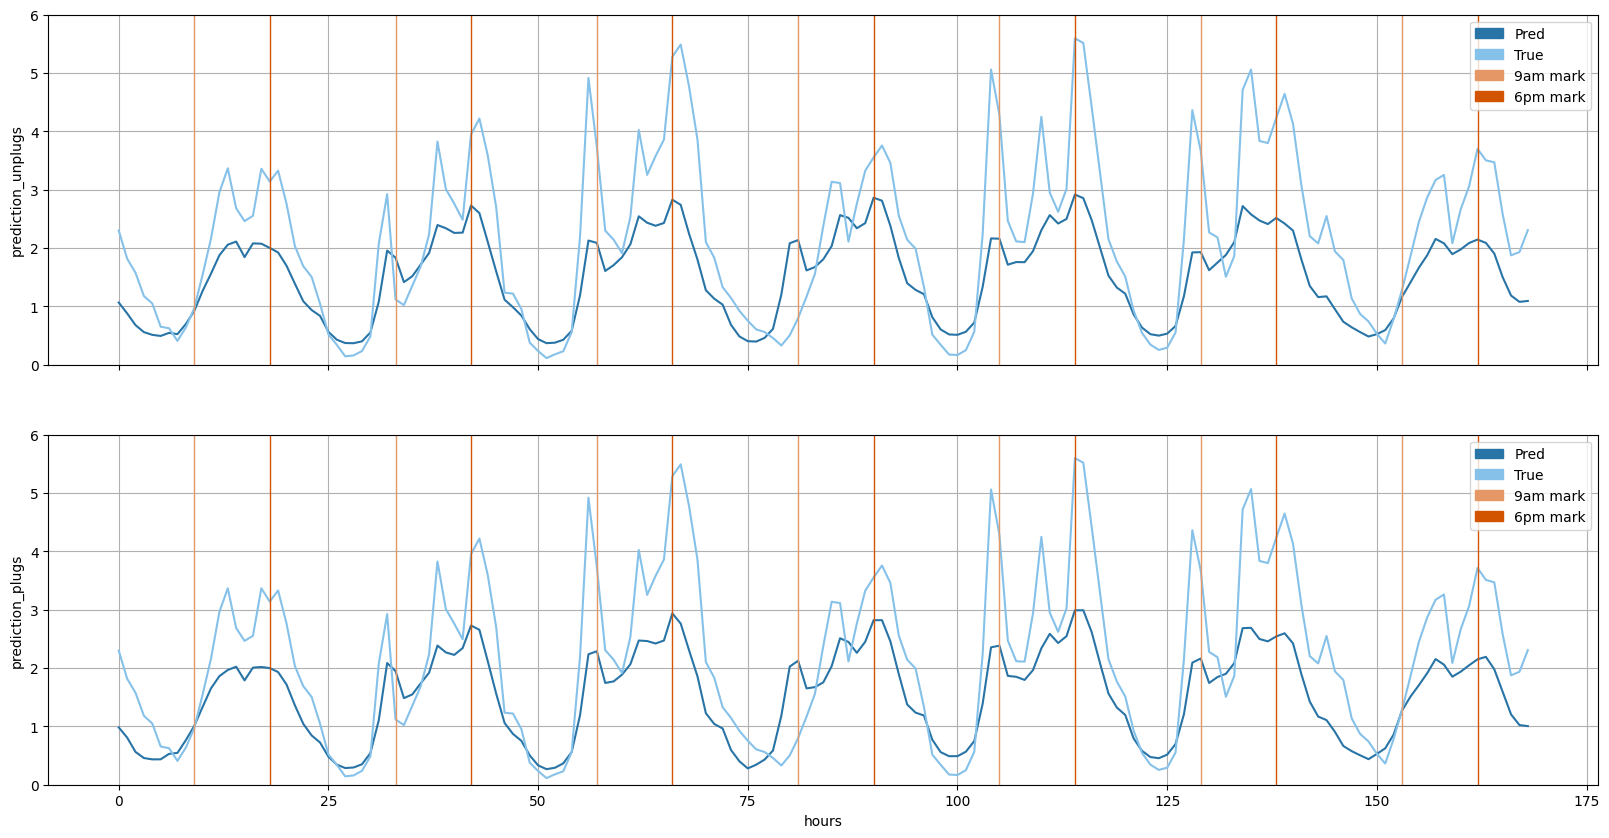

In [838]:
show_plugs_unplugs(XGB_data_2022_weather_grouped,start_date=start_date_2022_hispanity_day,end_date=end_date_2022_hispanity_day,time_column="time",upper_y_lim=6)